In [64]:
from models.cnn_gru import GRU
from models.cnn_lstm import LSTM
from models.cnn_rnn import RNN
from models.vanilla_cnn import CNN
from models.cnn_attention import CNN_Attention_Model
from utils.utils import fit
import torch
import torch.nn as nn
from torch.optim import Adam
from utils.seed import seed_everything

%load_ext autoreload
%autoreload 2

device = torch.device('cuda')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Shape of training set: (14535, 22, 200)
Shape of validation set: (500, 22, 200)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (14535, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 8/8 [00:00<00:00, 566.60it/s]


Epoch 1/100 loss: 1.3683831879967137, acc: 0.31331269349845203, val_loss: 1.326005443930626, val_acc: 0.368


100%|██████████| 8/8 [00:00<00:00, 562.47it/s]


Epoch 2/100 loss: 1.3172697524229686, acc: 0.37034743722050223, val_loss: 1.295198693871498, val_acc: 0.374


100%|██████████| 8/8 [00:00<00:00, 632.30it/s]


Epoch 3/100 loss: 1.2831899429622449, acc: 0.3913312693498452, val_loss: 1.2755277156829834, val_acc: 0.386


100%|██████████| 8/8 [00:00<00:00, 647.13it/s]


Epoch 4/100 loss: 1.2500615585268589, acc: 0.42043343653250775, val_loss: 1.2318854331970215, val_acc: 0.4


100%|██████████| 8/8 [00:00<00:00, 568.84it/s]


Epoch 5/100 loss: 1.2286387488507389, acc: 0.438046095631235, val_loss: 1.203676626086235, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 647.36it/s]


Epoch 6/100 loss: 1.1991683364960186, acc: 0.4617131062951496, val_loss: 1.189135879278183, val_acc: 0.452


100%|██████████| 8/8 [00:00<00:00, 645.97it/s]


Epoch 7/100 loss: 1.1721152759957731, acc: 0.4829033367733058, val_loss: 1.207074150443077, val_acc: 0.486


100%|██████████| 8/8 [00:00<00:00, 647.88it/s]


Epoch 8/100 loss: 1.1241570617023267, acc: 0.5047127622979016, val_loss: 1.103830337524414, val_acc: 0.542


100%|██████████| 8/8 [00:00<00:00, 591.98it/s]


Epoch 9/100 loss: 1.0912657489902096, acc: 0.5323013415892673, val_loss: 1.1205953657627106, val_acc: 0.52


100%|██████████| 8/8 [00:00<00:00, 655.50it/s]


Epoch 10/100 loss: 1.0636165719806103, acc: 0.5468868249054007, val_loss: 1.0902617499232292, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 654.90it/s]


Epoch 11/100 loss: 1.03828427666112, acc: 0.5539043687650499, val_loss: 1.0666527599096298, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 657.16it/s]


Epoch 12/100 loss: 0.9979366291510431, acc: 0.5834193326453389, val_loss: 1.0609752461314201, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 654.47it/s]


Epoch 13/100 loss: 0.9833630472421646, acc: 0.5861025111799105, val_loss: 1.064730666577816, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 657.99it/s]


Epoch 14/100 loss: 0.9501030309158459, acc: 0.5966976264189886, val_loss: 1.0841001346707344, val_acc: 0.578


100%|██████████| 8/8 [00:00<00:00, 575.36it/s]


Epoch 15/100 loss: 0.9202927337926731, acc: 0.6218094255245958, val_loss: 1.0819894969463348, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 655.78it/s]


Epoch 16/100 loss: 0.9117414331749866, acc: 0.6249742002063984, val_loss: 1.0959988459944725, val_acc: 0.562


100%|██████████| 8/8 [00:00<00:00, 583.13it/s]


Epoch 17/100 loss: 0.8727508268335409, acc: 0.6437564499484004, val_loss: 1.0970677509903908, val_acc: 0.572


100%|██████████| 8/8 [00:00<00:00, 663.64it/s]


Epoch 18/100 loss: 0.8711112152066147, acc: 0.6434812521499828, val_loss: 1.1083872243762016, val_acc: 0.554


100%|██████████| 8/8 [00:00<00:00, 576.86it/s]


Epoch 19/100 loss: 0.8420406038823881, acc: 0.6564155486756106, val_loss: 1.1266290098428726, val_acc: 0.576


100%|██████████| 8/8 [00:00<00:00, 654.55it/s]


Epoch 20/100 loss: 0.8239305246817438, acc: 0.6661162710698314, val_loss: 1.2428539991378784, val_acc: 0.546


100%|██████████| 8/8 [00:00<00:00, 659.38it/s]


Epoch 21/100 loss: 0.8142088021625552, acc: 0.6731338149294805, val_loss: 1.085993804037571, val_acc: 0.572


100%|██████████| 8/8 [00:00<00:00, 576.66it/s]


Epoch 22/100 loss: 0.7825454232985514, acc: 0.6882696938424493, val_loss: 1.1266719698905945, val_acc: 0.564


100%|██████████| 8/8 [00:00<00:00, 649.07it/s]


Epoch 23/100 loss: 0.761867723444052, acc: 0.6954248366013072, val_loss: 1.2674556970596313, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 654.62it/s]


Epoch 24/100 loss: 0.75816131879886, acc: 0.6975576195390437, val_loss: 1.2214245721697807, val_acc: 0.568


100%|██████████| 8/8 [00:00<00:00, 578.41it/s]


Epoch 25/100 loss: 0.7342870044603682, acc: 0.7103543171654627, val_loss: 1.1592133343219757, val_acc: 0.574


100%|██████████| 8/8 [00:00<00:00, 660.91it/s]


Epoch 26/100 loss: 0.7074667071564156, acc: 0.7176470588235294, val_loss: 1.1918713599443436, val_acc: 0.572


100%|██████████| 8/8 [00:00<00:00, 657.69it/s]


Epoch 27/100 loss: 0.6988507970644716, acc: 0.7235638114895081, val_loss: 1.2350055575370789, val_acc: 0.576


100%|██████████| 8/8 [00:00<00:00, 660.73it/s]


Epoch 28/100 loss: 0.6837113249981612, acc: 0.73140694874441, val_loss: 1.2673344835639, val_acc: 0.578


100%|██████████| 8/8 [00:00<00:00, 668.51it/s]


Epoch 29/100 loss: 0.6763718136047062, acc: 0.7327829377364982, val_loss: 1.3191803246736526, val_acc: 0.58


100%|██████████| 8/8 [00:00<00:00, 656.99it/s]


Epoch 30/100 loss: 0.6456120046868659, acc: 0.7455108359133127, val_loss: 1.261643648147583, val_acc: 0.584


100%|██████████| 8/8 [00:00<00:00, 652.61it/s]


Epoch 31/100 loss: 0.6425133960550291, acc: 0.7454420364637083, val_loss: 1.248118594288826, val_acc: 0.576


100%|██████████| 8/8 [00:00<00:00, 581.93it/s]


Epoch 32/100 loss: 0.6272114557132387, acc: 0.7518403852769178, val_loss: 1.2093672007322311, val_acc: 0.588


100%|██████████| 8/8 [00:00<00:00, 665.38it/s]


Epoch 33/100 loss: 0.6196756955040129, acc: 0.7579635362917096, val_loss: 1.335863210260868, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 659.57it/s]


Epoch 34/100 loss: 0.5990602848561186, acc: 0.765187478500172, val_loss: 1.3370370864868164, val_acc: 0.568


100%|██████████| 8/8 [00:00<00:00, 655.27it/s]


Epoch 35/100 loss: 0.5894966554223445, acc: 0.769453044375645, val_loss: 1.399705410003662, val_acc: 0.554


100%|██████████| 8/8 [00:00<00:00, 632.02it/s]


Epoch 36/100 loss: 0.5705473676585314, acc: 0.7788785689714482, val_loss: 1.2899948731064796, val_acc: 0.6


100%|██████████| 8/8 [00:00<00:00, 580.51it/s]


Epoch 37/100 loss: 0.5655238951245943, acc: 0.7790161678706571, val_loss: 1.3170048147439957, val_acc: 0.582


100%|██████████| 8/8 [00:00<00:00, 648.11it/s]


Epoch 38/100 loss: 0.5473267862148452, acc: 0.7878224974200206, val_loss: 1.4080592393875122, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 649.12it/s]


Epoch 39/100 loss: 0.5562903819638386, acc: 0.7843825249398004, val_loss: 1.4439371675252914, val_acc: 0.564


100%|██████████| 8/8 [00:00<00:00, 611.16it/s]


Epoch 40/100 loss: 0.530536432930252, acc: 0.7953216374269005, val_loss: 1.4691770523786545, val_acc: 0.548


100%|██████████| 8/8 [00:00<00:00, 654.94it/s]


Epoch 41/100 loss: 0.5320084653141206, acc: 0.7925696594427245, val_loss: 1.3510707765817642, val_acc: 0.596


100%|██████████| 8/8 [00:00<00:00, 656.23it/s]


Epoch 42/100 loss: 0.5071585127397588, acc: 0.8040591675266597, val_loss: 1.4662698358297348, val_acc: 0.598


100%|██████████| 8/8 [00:00<00:00, 649.47it/s]


Epoch 43/100 loss: 0.5158816700180372, acc: 0.7978672170622635, val_loss: 1.3634853214025497, val_acc: 0.568


100%|██████████| 8/8 [00:00<00:00, 634.17it/s]


Epoch 44/100 loss: 0.4838202709430142, acc: 0.8136222910216718, val_loss: 1.565149411559105, val_acc: 0.54


100%|██████████| 8/8 [00:00<00:00, 648.65it/s]


Epoch 45/100 loss: 0.49382015291536063, acc: 0.8061231510147919, val_loss: 1.5312360376119614, val_acc: 0.546


100%|██████████| 8/8 [00:00<00:00, 639.73it/s]


Epoch 46/100 loss: 0.471225356715813, acc: 0.8187134502923976, val_loss: 1.4938592463731766, val_acc: 0.548


100%|██████████| 8/8 [00:00<00:00, 661.07it/s]


Epoch 47/100 loss: 0.4803817159120451, acc: 0.8143102855177159, val_loss: 1.5247595459222794, val_acc: 0.552


100%|██████████| 8/8 [00:00<00:00, 647.11it/s]


Epoch 48/100 loss: 0.449903130596667, acc: 0.8288269693842449, val_loss: 1.4399746507406235, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 654.13it/s]


Epoch 49/100 loss: 0.4538565129041672, acc: 0.8240798073615411, val_loss: 1.5770046710968018, val_acc: 0.552


100%|██████████| 8/8 [00:00<00:00, 661.21it/s]


Epoch 50/100 loss: 0.44401458611613825, acc: 0.8304093567251462, val_loss: 1.536963015794754, val_acc: 0.56


100%|██████████| 8/8 [00:00<00:00, 658.65it/s]


Epoch 51/100 loss: 0.4405095089684453, acc: 0.8339869281045752, val_loss: 1.663663163781166, val_acc: 0.562


100%|██████████| 8/8 [00:00<00:00, 658.27it/s]


Epoch 52/100 loss: 0.4264588945528917, acc: 0.8407292741658067, val_loss: 1.4319742619991302, val_acc: 0.564


100%|██████████| 8/8 [00:00<00:00, 658.95it/s]


Epoch 53/100 loss: 0.415070933077419, acc: 0.8428620571035431, val_loss: 1.616669774055481, val_acc: 0.568


100%|██████████| 8/8 [00:00<00:00, 660.49it/s]


Epoch 54/100 loss: 0.4092305641817419, acc: 0.8458204334365325, val_loss: 1.679012268781662, val_acc: 0.554


100%|██████████| 8/8 [00:00<00:00, 668.89it/s]


Epoch 55/100 loss: 0.39034952255978916, acc: 0.8544203646370829, val_loss: 1.6757107079029083, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 663.81it/s]


Epoch 56/100 loss: 0.3926353048729269, acc: 0.8527003783969728, val_loss: 1.588854044675827, val_acc: 0.57


100%|██████████| 8/8 [00:00<00:00, 653.60it/s]


Epoch 57/100 loss: 0.3867468343100004, acc: 0.8531819745442036, val_loss: 1.6838660836219788, val_acc: 0.568


100%|██████████| 8/8 [00:00<00:00, 655.33it/s]


Epoch 58/100 loss: 0.38952013000584484, acc: 0.8553835569315446, val_loss: 1.617983654141426, val_acc: 0.544


100%|██████████| 8/8 [00:00<00:00, 651.88it/s]


Epoch 59/100 loss: 0.3924534424093732, acc: 0.8522875816993464, val_loss: 1.6625324487686157, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 653.59it/s]


Epoch 60/100 loss: 0.37018437245697305, acc: 0.8606123151014792, val_loss: 1.4798185974359512, val_acc: 0.596


100%|██████████| 8/8 [00:00<00:00, 658.12it/s]


Epoch 61/100 loss: 0.3652681048240578, acc: 0.8641898864809081, val_loss: 1.6678435653448105, val_acc: 0.546


100%|██████████| 8/8 [00:00<00:00, 656.22it/s]


Epoch 62/100 loss: 0.36498996148114665, acc: 0.8606123151014792, val_loss: 1.6486055701971054, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 661.71it/s]


Epoch 63/100 loss: 0.35492251793804924, acc: 0.8676986584107327, val_loss: 1.7521426230669022, val_acc: 0.54


100%|██████████| 8/8 [00:00<00:00, 652.25it/s]


Epoch 64/100 loss: 0.33745664691454486, acc: 0.8759545923632611, val_loss: 1.6669942438602448, val_acc: 0.57


100%|██████████| 8/8 [00:00<00:00, 665.23it/s]


Epoch 65/100 loss: 0.3404418073855994, acc: 0.8740282077743378, val_loss: 1.6829450726509094, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 658.18it/s]


Epoch 66/100 loss: 0.3234814668825844, acc: 0.8797385620915033, val_loss: 1.715472549200058, val_acc: 0.544


100%|██████████| 8/8 [00:00<00:00, 660.79it/s]


Epoch 67/100 loss: 0.3197567702450773, acc: 0.8805641554867562, val_loss: 1.6918016821146011, val_acc: 0.56


100%|██████████| 8/8 [00:00<00:00, 658.51it/s]


Epoch 68/100 loss: 0.32355446162584584, acc: 0.8796009631922944, val_loss: 1.7130070477724075, val_acc: 0.578


100%|██████████| 8/8 [00:00<00:00, 654.95it/s]


Epoch 69/100 loss: 0.3155810173535556, acc: 0.8841417268661851, val_loss: 1.7599166333675385, val_acc: 0.574


100%|██████████| 8/8 [00:00<00:00, 661.46it/s]


Epoch 70/100 loss: 0.3185499676486902, acc: 0.8813897488820089, val_loss: 1.7957503348588943, val_acc: 0.528


100%|██████████| 8/8 [00:00<00:00, 657.71it/s]


Epoch 71/100 loss: 0.31151660414118515, acc: 0.8842793257653939, val_loss: 1.740361139178276, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 653.94it/s]


Epoch 72/100 loss: 0.2990212779688208, acc: 0.8898520811833506, val_loss: 1.8352925032377243, val_acc: 0.524


100%|██████████| 8/8 [00:00<00:00, 654.04it/s]


Epoch 73/100 loss: 0.29248223042017535, acc: 0.8939112487100103, val_loss: 1.7682089358568192, val_acc: 0.562


100%|██████████| 8/8 [00:00<00:00, 651.29it/s]


Epoch 74/100 loss: 0.2845608623731032, acc: 0.894874441004472, val_loss: 1.8315194696187973, val_acc: 0.534


100%|██████████| 8/8 [00:00<00:00, 652.57it/s]


Epoch 75/100 loss: 0.2944491898412244, acc: 0.8901272789817681, val_loss: 1.735529750585556, val_acc: 0.588


100%|██████████| 8/8 [00:00<00:00, 655.40it/s]


Epoch 76/100 loss: 0.28648588871746733, acc: 0.8922600619195047, val_loss: 1.8043040931224823, val_acc: 0.572


100%|██████████| 8/8 [00:00<00:00, 656.99it/s]


Epoch 77/100 loss: 0.29448691899316354, acc: 0.8944616443068455, val_loss: 1.8529313951730728, val_acc: 0.536


100%|██████████| 8/8 [00:00<00:00, 649.90it/s]


Epoch 78/100 loss: 0.28352457494066474, acc: 0.8963192294461644, val_loss: 1.8885620385408401, val_acc: 0.54


100%|██████████| 8/8 [00:00<00:00, 572.46it/s]


Epoch 79/100 loss: 0.26926732066561254, acc: 0.9011351909184726, val_loss: 1.8874792605638504, val_acc: 0.544


100%|██████████| 8/8 [00:00<00:00, 654.75it/s]


Epoch 80/100 loss: 0.2779110496896401, acc: 0.8961816305469557, val_loss: 1.80380080640316, val_acc: 0.56


100%|██████████| 8/8 [00:00<00:00, 653.98it/s]


Epoch 81/100 loss: 0.2699851969812523, acc: 0.9006535947712418, val_loss: 1.95172581076622, val_acc: 0.538


100%|██████████| 8/8 [00:00<00:00, 656.82it/s]


Epoch 82/100 loss: 0.2566612300119902, acc: 0.9072583419332645, val_loss: 1.96349436044693, val_acc: 0.554


100%|██████████| 8/8 [00:00<00:00, 658.72it/s]


Epoch 83/100 loss: 0.2753536254167557, acc: 0.8987272101823185, val_loss: 1.700389251112938, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 662.41it/s]


Epoch 84/100 loss: 0.25379973790493976, acc: 0.9054007567939456, val_loss: 1.7614720463752747, val_acc: 0.558


100%|██████████| 8/8 [00:00<00:00, 652.96it/s]


Epoch 85/100 loss: 0.2593782022268626, acc: 0.9040247678018576, val_loss: 1.952554538846016, val_acc: 0.528


100%|██████████| 8/8 [00:00<00:00, 661.21it/s]


Epoch 86/100 loss: 0.2602856130780358, acc: 0.9023047815617475, val_loss: 1.8142728209495544, val_acc: 0.538


100%|██████████| 8/8 [00:00<00:00, 660.00it/s]


Epoch 87/100 loss: 0.2485979512137802, acc: 0.9106983144134847, val_loss: 1.8277783542871475, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 655.68it/s]


Epoch 88/100 loss: 0.23836421286850645, acc: 0.9139318885448916, val_loss: 1.9298085421323776, val_acc: 0.556


100%|██████████| 8/8 [00:00<00:00, 657.05it/s]


Epoch 89/100 loss: 0.23906834853257528, acc: 0.9132438940488476, val_loss: 2.0037188977003098, val_acc: 0.546


100%|██████████| 8/8 [00:00<00:00, 655.36it/s]


Epoch 90/100 loss: 0.22427058955164333, acc: 0.9177158582731338, val_loss: 1.897300660610199, val_acc: 0.538


100%|██████████| 8/8 [00:00<00:00, 660.34it/s]


Epoch 91/100 loss: 0.2376475872047115, acc: 0.9128998968008256, val_loss: 1.804018646478653, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 568.57it/s]


Epoch 92/100 loss: 0.2298317512399272, acc: 0.9163398692810457, val_loss: 1.8833632320165634, val_acc: 0.556


100%|██████████| 8/8 [00:00<00:00, 654.86it/s]


Epoch 93/100 loss: 0.23980693345922127, acc: 0.9141382868937048, val_loss: 1.8902244120836258, val_acc: 0.58


100%|██████████| 8/8 [00:00<00:00, 658.36it/s]


Epoch 94/100 loss: 0.23209638635448196, acc: 0.9152390780873753, val_loss: 1.876462161540985, val_acc: 0.552


100%|██████████| 8/8 [00:00<00:00, 659.66it/s]


Epoch 95/100 loss: 0.2393291871341174, acc: 0.913656690746474, val_loss: 1.897634133696556, val_acc: 0.566


100%|██████████| 8/8 [00:00<00:00, 655.27it/s]


Epoch 96/100 loss: 0.24552886446186326, acc: 0.9117991056071552, val_loss: 1.8874908983707428, val_acc: 0.578


100%|██████████| 8/8 [00:00<00:00, 581.24it/s]


Epoch 97/100 loss: 0.2402364778936955, acc: 0.9143446852425181, val_loss: 1.7378629446029663, val_acc: 0.562


100%|██████████| 8/8 [00:00<00:00, 655.55it/s]


Epoch 98/100 loss: 0.22427535766180148, acc: 0.9206054351565187, val_loss: 1.8478434830904007, val_acc: 0.56


100%|██████████| 8/8 [00:00<00:00, 629.93it/s]


Epoch 99/100 loss: 0.20881246100588327, acc: 0.9244582043343653, val_loss: 1.930278867483139, val_acc: 0.55


100%|██████████| 8/8 [00:00<00:00, 654.86it/s]


Epoch 100/100 loss: 0.22681760961157188, acc: 0.9194358445132439, val_loss: 2.1125781387090683, val_acc: 0.542


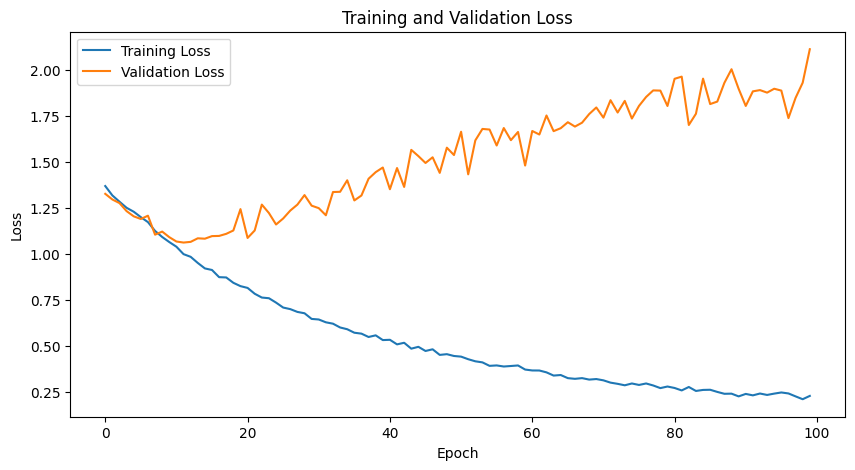

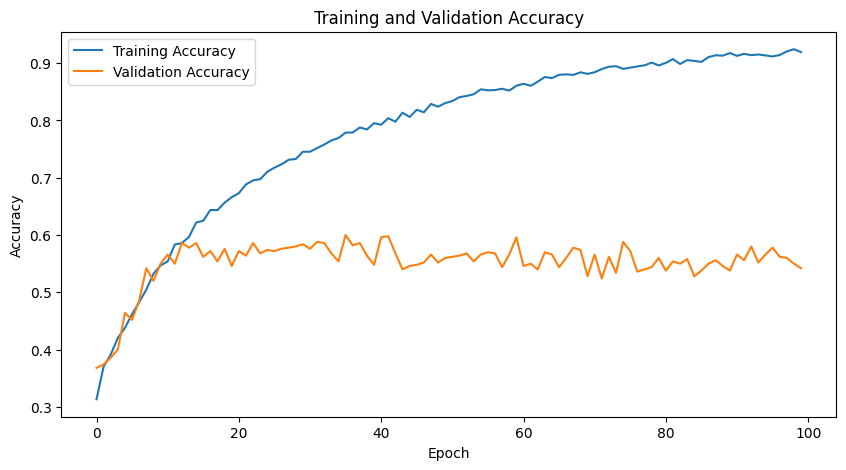

In [51]:
seed_everything(0)
model = GRU(input_dim=22, conv_dims=[32, 64, 128], hidden_dim=256, num_layers=1)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=100, device=device)

Shape of training set: (14535, 22, 200)
Shape of validation set: (500, 22, 200)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (14535, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 8/8 [00:00<00:00, 705.90it/s]


Epoch 1/100 loss: 1.3628796511574794, acc: 0.3222566219470244, val_loss: 1.2881693691015244, val_acc: 0.394


100%|██████████| 8/8 [00:00<00:00, 715.57it/s]


Epoch 2/100 loss: 1.2919547578744721, acc: 0.40763673890608876, val_loss: 1.178719311952591, val_acc: 0.496


100%|██████████| 8/8 [00:00<00:00, 716.41it/s]


Epoch 3/100 loss: 1.2279578541454517, acc: 0.4540763673890609, val_loss: 1.111372783780098, val_acc: 0.528


100%|██████████| 8/8 [00:00<00:00, 715.25it/s]


Epoch 4/100 loss: 1.1646609034454614, acc: 0.4970072239422085, val_loss: 1.0410990342497826, val_acc: 0.586


100%|██████████| 8/8 [00:00<00:00, 713.15it/s]


Epoch 5/100 loss: 1.1172820230325062, acc: 0.5270037839697282, val_loss: 1.0126262605190277, val_acc: 0.584


100%|██████████| 8/8 [00:00<00:00, 722.16it/s]


Epoch 6/100 loss: 1.0687646369139354, acc: 0.556656346749226, val_loss: 1.0182439088821411, val_acc: 0.574


100%|██████████| 8/8 [00:00<00:00, 702.71it/s]


Epoch 7/100 loss: 1.0347228949530083, acc: 0.573374613003096, val_loss: 0.9827072992920876, val_acc: 0.6


100%|██████████| 8/8 [00:00<00:00, 702.52it/s]


Epoch 8/100 loss: 0.998467447987774, acc: 0.594358445132439, val_loss: 0.93819510191679, val_acc: 0.622


100%|██████████| 8/8 [00:00<00:00, 715.87it/s]


Epoch 9/100 loss: 0.9724410275618235, acc: 0.6037151702786377, val_loss: 0.9250257313251495, val_acc: 0.638


100%|██████████| 8/8 [00:00<00:00, 717.94it/s]


Epoch 10/100 loss: 0.9400860047654102, acc: 0.6228414172686618, val_loss: 0.9090285897254944, val_acc: 0.622


100%|██████████| 8/8 [00:00<00:00, 717.28it/s]


Epoch 11/100 loss: 0.9207739050973925, acc: 0.6336429308565531, val_loss: 0.896599180996418, val_acc: 0.65


100%|██████████| 8/8 [00:00<00:00, 718.33it/s]


Epoch 12/100 loss: 0.8967535205577549, acc: 0.6441004471964225, val_loss: 0.8678100183606148, val_acc: 0.648


100%|██████████| 8/8 [00:00<00:00, 717.57it/s]


Epoch 13/100 loss: 0.8719957099671949, acc: 0.6577915376676987, val_loss: 0.8827894628047943, val_acc: 0.658


100%|██████████| 8/8 [00:00<00:00, 706.92it/s]


Epoch 14/100 loss: 0.8563789330553591, acc: 0.6590987272101824, val_loss: 0.8935054466128349, val_acc: 0.648


100%|██████████| 8/8 [00:00<00:00, 720.93it/s]


Epoch 15/100 loss: 0.8328505749242348, acc: 0.6732714138286894, val_loss: 0.8571915477514267, val_acc: 0.648


100%|██████████| 8/8 [00:00<00:00, 718.90it/s]


Epoch 16/100 loss: 0.8092157100899178, acc: 0.6880632954936361, val_loss: 0.8383049294352531, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 696.06it/s]


Epoch 17/100 loss: 0.7983262996401703, acc: 0.6879944960440316, val_loss: 0.8364739343523979, val_acc: 0.662


100%|██████████| 8/8 [00:00<00:00, 705.89it/s]


Epoch 18/100 loss: 0.7794773128994724, acc: 0.695218438252494, val_loss: 0.8705022111535072, val_acc: 0.642


100%|██████████| 8/8 [00:00<00:00, 678.64it/s]


Epoch 19/100 loss: 0.7619390733409346, acc: 0.6993464052287581, val_loss: 0.8175406754016876, val_acc: 0.668


100%|██████████| 8/8 [00:00<00:00, 700.14it/s]


Epoch 20/100 loss: 0.7553703358821702, acc: 0.7060199518403852, val_loss: 0.8256949260830879, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 716.41it/s]


Epoch 21/100 loss: 0.7318811215329588, acc: 0.717922256621947, val_loss: 0.8233969584107399, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 705.16it/s]


Epoch 22/100 loss: 0.7159125117356318, acc: 0.7277605779153766, val_loss: 0.8565905317664146, val_acc: 0.662


100%|██████████| 8/8 [00:00<00:00, 706.22it/s]


Epoch 23/100 loss: 0.7085945229781302, acc: 0.7265221878224974, val_loss: 0.8151491284370422, val_acc: 0.67


100%|██████████| 8/8 [00:00<00:00, 715.87it/s]


Epoch 24/100 loss: 0.6985030472278595, acc: 0.7308565531475748, val_loss: 0.8228659257292747, val_acc: 0.674


100%|██████████| 8/8 [00:00<00:00, 719.65it/s]


Epoch 25/100 loss: 0.6825314969347235, acc: 0.7367733058135535, val_loss: 0.8168048858642578, val_acc: 0.67


100%|██████████| 8/8 [00:00<00:00, 699.63it/s]


Epoch 26/100 loss: 0.6772818493477085, acc: 0.7426212590299278, val_loss: 0.8275940790772438, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 721.12it/s]


Epoch 27/100 loss: 0.6635373956278751, acc: 0.7517715858273134, val_loss: 0.8388449996709824, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 710.13it/s]


Epoch 28/100 loss: 0.6536520552216915, acc: 0.7528723770209839, val_loss: 0.8188544288277626, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 707.32it/s]


Epoch 29/100 loss: 0.6414342342238677, acc: 0.7571379428964569, val_loss: 0.8256540074944496, val_acc: 0.67


100%|██████████| 8/8 [00:00<00:00, 706.38it/s]


Epoch 30/100 loss: 0.6329102825961614, acc: 0.7628482972136222, val_loss: 0.8692435249686241, val_acc: 0.666


100%|██████████| 8/8 [00:00<00:00, 710.63it/s]


Epoch 31/100 loss: 0.61680406737223, acc: 0.7695218438252494, val_loss: 0.8330115228891373, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 705.22it/s]


Epoch 32/100 loss: 0.6123480306644189, acc: 0.7686274509803922, val_loss: 0.8183305487036705, val_acc: 0.672


100%|██████████| 8/8 [00:00<00:00, 716.70it/s]


Epoch 33/100 loss: 0.6033724388271048, acc: 0.7734434124527004, val_loss: 0.8816801384091377, val_acc: 0.668


100%|██████████| 8/8 [00:00<00:00, 707.75it/s]


Epoch 34/100 loss: 0.5881394234142805, acc: 0.782593739250086, val_loss: 0.8635126426815987, val_acc: 0.666


100%|██████████| 8/8 [00:00<00:00, 706.08it/s]


Epoch 35/100 loss: 0.5847959647837438, acc: 0.7810113519091847, val_loss: 0.8556411787867546, val_acc: 0.66


100%|██████████| 8/8 [00:00<00:00, 675.60it/s]


Epoch 36/100 loss: 0.5862091496063951, acc: 0.7803921568627451, val_loss: 0.8603538572788239, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 714.96it/s]


Epoch 37/100 loss: 0.5731516574558458, acc: 0.7835569315445476, val_loss: 0.8491034731268883, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 715.07it/s]


Epoch 38/100 loss: 0.5630225072565832, acc: 0.7942896456828346, val_loss: 0.8622385933995247, val_acc: 0.698


100%|██████████| 8/8 [00:00<00:00, 719.97it/s]


Epoch 39/100 loss: 0.5500577263403357, acc: 0.7966288269693842, val_loss: 0.8696513324975967, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 718.39it/s]


Epoch 40/100 loss: 0.5512797530544432, acc: 0.7951152390780873, val_loss: 0.8576658889651299, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 712.11it/s]


Epoch 41/100 loss: 0.5416809440704814, acc: 0.8001375988992088, val_loss: 0.8597222566604614, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 719.50it/s]


Epoch 42/100 loss: 0.5340574177210791, acc: 0.8060543515651875, val_loss: 0.8556464612483978, val_acc: 0.7


100%|██████████| 8/8 [00:00<00:00, 717.74it/s]


Epoch 43/100 loss: 0.5324899528110236, acc: 0.8015823873409013, val_loss: 0.8379551470279694, val_acc: 0.7


100%|██████████| 8/8 [00:00<00:00, 720.86it/s]


Epoch 44/100 loss: 0.5288951721107751, acc: 0.804609563123495, val_loss: 0.8886789828538895, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 715.49it/s]


Epoch 45/100 loss: 0.5167001373412317, acc: 0.8111455108359134, val_loss: 0.8637254759669304, val_acc: 0.7


100%|██████████| 8/8 [00:00<00:00, 717.82it/s]


Epoch 46/100 loss: 0.5073975030528871, acc: 0.8105263157894737, val_loss: 0.8624517694115639, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 720.76it/s]


Epoch 47/100 loss: 0.5112565947990668, acc: 0.8123839009287925, val_loss: 0.888307698071003, val_acc: 0.66


100%|██████████| 8/8 [00:00<00:00, 720.87it/s]


Epoch 48/100 loss: 0.5083923635252735, acc: 0.8153422772617819, val_loss: 0.8722769767045975, val_acc: 0.678


100%|██████████| 8/8 [00:00<00:00, 717.36it/s]


Epoch 49/100 loss: 0.5066209840669966, acc: 0.8152734778121775, val_loss: 0.8591490089893341, val_acc: 0.706


100%|██████████| 8/8 [00:00<00:00, 721.79it/s]


Epoch 50/100 loss: 0.492165008657857, acc: 0.822703818369453, val_loss: 0.8791573345661163, val_acc: 0.698


100%|██████████| 8/8 [00:00<00:00, 715.28it/s]


Epoch 51/100 loss: 0.4843747926908627, acc: 0.8235294117647058, val_loss: 0.8846035674214363, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 717.59it/s]


Epoch 52/100 loss: 0.47818848647569356, acc: 0.8300653594771242, val_loss: 0.8876460492610931, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 617.99it/s]


Epoch 53/100 loss: 0.4845890743952048, acc: 0.8202958376332989, val_loss: 0.8683254048228264, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 717.27it/s]


Epoch 54/100 loss: 0.4775924183297576, acc: 0.8255245958032336, val_loss: 0.8710771128535271, val_acc: 0.69


100%|██████████| 8/8 [00:00<00:00, 716.07it/s]


Epoch 55/100 loss: 0.46910618376313595, acc: 0.8295837633298934, val_loss: 0.864999309182167, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 549.16it/s]


Epoch 56/100 loss: 0.4672810786910224, acc: 0.8304093567251462, val_loss: 0.9091552719473839, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 722.61it/s]


Epoch 57/100 loss: 0.46261606038662423, acc: 0.8339181286549707, val_loss: 0.8840775266289711, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 720.30it/s]


Epoch 58/100 loss: 0.455940194558679, acc: 0.8356381148950809, val_loss: 0.8883754685521126, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 717.67it/s]


Epoch 59/100 loss: 0.4527361046588212, acc: 0.8381836945304437, val_loss: 0.8777563944458961, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 720.79it/s]


Epoch 60/100 loss: 0.449962331014767, acc: 0.8421052631578947, val_loss: 0.8754507601261139, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 720.59it/s]


Epoch 61/100 loss: 0.452626546877518, acc: 0.8367389060887513, val_loss: 0.8797872588038445, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 724.86it/s]


Epoch 62/100 loss: 0.4409811875799246, acc: 0.8412796697626419, val_loss: 0.8989585712552071, val_acc: 0.68


100%|██████████| 8/8 [00:00<00:00, 721.46it/s]


Epoch 63/100 loss: 0.44087142248948413, acc: 0.8401788785689714, val_loss: 0.8962341398000717, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 722.32it/s]


Epoch 64/100 loss: 0.44268498765794856, acc: 0.8393532851737187, val_loss: 0.8959725052118301, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 723.59it/s]


Epoch 65/100 loss: 0.4335221890033337, acc: 0.8465084279325765, val_loss: 0.8809395730495453, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 720.47it/s]


Epoch 66/100 loss: 0.43210784247831296, acc: 0.8470588235294118, val_loss: 0.8771344944834709, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 724.78it/s]


Epoch 67/100 loss: 0.4319568927350797, acc: 0.8432060543515651, val_loss: 0.8956961184740067, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 723.47it/s]


Epoch 68/100 loss: 0.42467802841412394, acc: 0.8503611971104231, val_loss: 0.8992935419082642, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 720.19it/s]


Epoch 69/100 loss: 0.41631571210005824, acc: 0.8524251805985552, val_loss: 0.8998574540019035, val_acc: 0.68


100%|██████████| 8/8 [00:00<00:00, 721.46it/s]


Epoch 70/100 loss: 0.42213319581851627, acc: 0.8502923976608188, val_loss: 0.8870533108711243, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 722.27it/s]


Epoch 71/100 loss: 0.4259751235183917, acc: 0.848297213622291, val_loss: 0.8725026100873947, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 713.51it/s]


Epoch 72/100 loss: 0.41916883776062414, acc: 0.8504299965600275, val_loss: 0.8715983256697655, val_acc: 0.722


100%|██████████| 8/8 [00:00<00:00, 716.13it/s]


Epoch 73/100 loss: 0.41102320504815953, acc: 0.8538699690402477, val_loss: 0.9006202146410942, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 695.36it/s]


Epoch 74/100 loss: 0.40887519821786045, acc: 0.8565531475748194, val_loss: 0.8810185641050339, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 708.23it/s]


Epoch 75/100 loss: 0.40434899233412325, acc: 0.8576539387684898, val_loss: 0.8526713326573372, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 720.14it/s]


Epoch 76/100 loss: 0.4110682008036396, acc: 0.8538699690402477, val_loss: 0.8997251242399216, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 723.05it/s]


Epoch 77/100 loss: 0.4075178179824561, acc: 0.8590987272101823, val_loss: 0.8677359148859978, val_acc: 0.704


100%|██████████| 8/8 [00:00<00:00, 722.84it/s]


Epoch 78/100 loss: 0.398828435427787, acc: 0.8567595459236326, val_loss: 0.8806718587875366, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 618.89it/s]


Epoch 79/100 loss: 0.39334221412999587, acc: 0.8590987272101823, val_loss: 0.8898517340421677, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 723.44it/s]


Epoch 80/100 loss: 0.400142239243315, acc: 0.8569659442724458, val_loss: 0.866865836083889, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 718.73it/s]


Epoch 81/100 loss: 0.4021315134800317, acc: 0.8544203646370829, val_loss: 0.8926454037427902, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 720.56it/s]


Epoch 82/100 loss: 0.3950401758938505, acc: 0.8596491228070176, val_loss: 0.8639931306242943, val_acc: 0.678


100%|██████████| 8/8 [00:00<00:00, 718.43it/s]


Epoch 83/100 loss: 0.38884383224343, acc: 0.862125902992776, val_loss: 0.8918203040957451, val_acc: 0.702


100%|██████████| 8/8 [00:00<00:00, 718.43it/s]


Epoch 84/100 loss: 0.39282466307805297, acc: 0.8575851393188855, val_loss: 0.8959242925047874, val_acc: 0.692


100%|██████████| 8/8 [00:00<00:00, 726.54it/s]


Epoch 85/100 loss: 0.3865664528127302, acc: 0.8638458892328862, val_loss: 0.8796884939074516, val_acc: 0.672


100%|██████████| 8/8 [00:00<00:00, 715.31it/s]


Epoch 86/100 loss: 0.38485382490775044, acc: 0.8652906776745786, val_loss: 0.8837097585201263, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 716.18it/s]


Epoch 87/100 loss: 0.3818538251022498, acc: 0.8683178534571724, val_loss: 0.9313953667879105, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 720.28it/s]


Epoch 88/100 loss: 0.3857480223503029, acc: 0.8625386996904024, val_loss: 0.933228112757206, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 718.17it/s]


Epoch 89/100 loss: 0.3767727531100574, acc: 0.8687306501547988, val_loss: 0.9348801821470261, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 721.10it/s]


Epoch 90/100 loss: 0.38706662342475173, acc: 0.866047471620227, val_loss: 0.9067295044660568, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 716.59it/s]


Epoch 91/100 loss: 0.3812634035814227, acc: 0.8661162710698315, val_loss: 0.9364541098475456, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 720.93it/s]


Epoch 92/100 loss: 0.3785081476365265, acc: 0.8648778809769522, val_loss: 0.940373994410038, val_acc: 0.678


100%|██████████| 8/8 [00:00<00:00, 722.18it/s]


Epoch 93/100 loss: 0.37709690512795196, acc: 0.8657034743722051, val_loss: 0.9206724613904953, val_acc: 0.678


100%|██████████| 8/8 [00:00<00:00, 714.82it/s]


Epoch 94/100 loss: 0.3781503364443779, acc: 0.8669418644650843, val_loss: 0.9244936481118202, val_acc: 0.682


100%|██████████| 8/8 [00:00<00:00, 718.90it/s]


Epoch 95/100 loss: 0.37343283964876545, acc: 0.8695562435500516, val_loss: 0.8825037255883217, val_acc: 0.68


100%|██████████| 8/8 [00:00<00:00, 720.95it/s]


Epoch 96/100 loss: 0.37289590976740183, acc: 0.8711386308909529, val_loss: 0.9334425181150436, val_acc: 0.668


100%|██████████| 8/8 [00:00<00:00, 719.67it/s]


Epoch 97/100 loss: 0.37600337687814445, acc: 0.8691434468524252, val_loss: 0.906479574739933, val_acc: 0.692


100%|██████████| 8/8 [00:00<00:00, 720.45it/s]


Epoch 98/100 loss: 0.3738697480998541, acc: 0.8682490540075679, val_loss: 0.9333919882774353, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 720.18it/s]


Epoch 99/100 loss: 0.3640096557506344, acc: 0.874578603371173, val_loss: 0.9315550848841667, val_acc: 0.676


100%|██████████| 8/8 [00:00<00:00, 704.91it/s]


Epoch 100/100 loss: 0.3619054701636758, acc: 0.8734778121775025, val_loss: 0.935369536280632, val_acc: 0.678


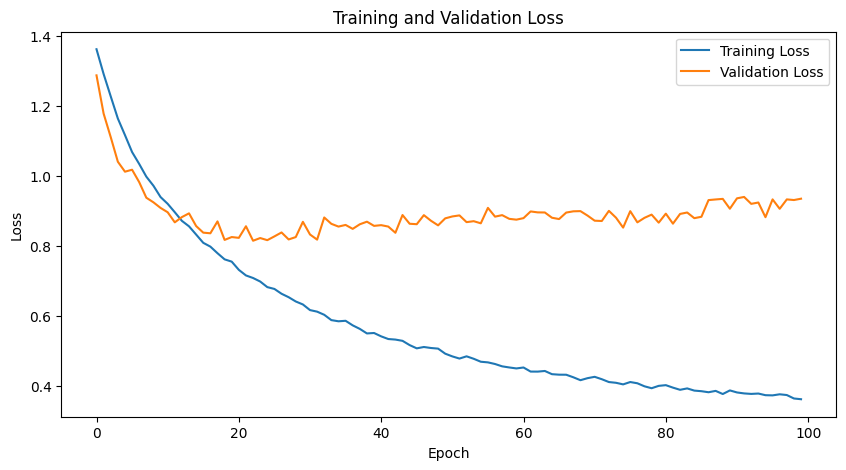

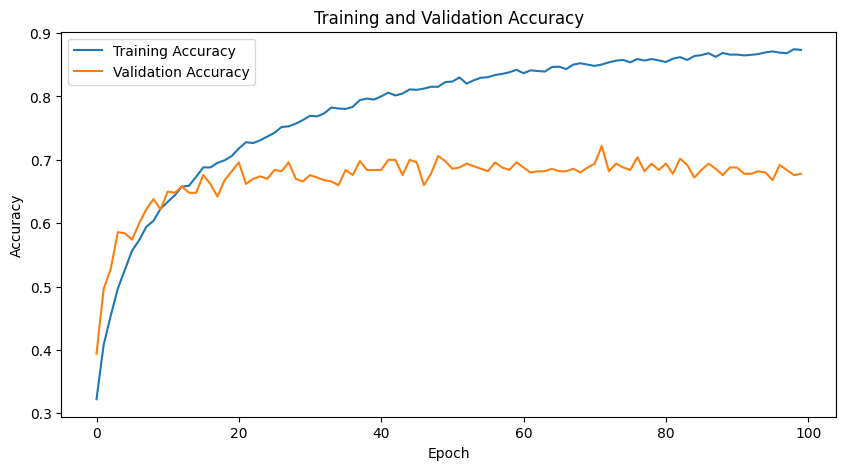

In [63]:
seed_everything(0)
model = LSTM(input_dim=22, conv_dims=[32, 64, 128], hidden_dim=64, num_layers=1)
model.to(device)
# model = LSTM(input_dim=22, conv_dims=[32, 64], hidden_dim=128, num_layers=1)

optimizer = Adam(model.parameters(), weight_decay=1e-2, lr=1e-4)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=100, device=device)

Shape of training set: (14535, 22, 400)
Shape of validation set: (500, 22, 400)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (14535, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 8/8 [00:00<00:00, 590.34it/s]


Epoch 1/100 loss: 1.3983303664023417, acc: 0.2611627106983144, val_loss: 1.3941044807434082, val_acc: 0.248


100%|██████████| 8/8 [00:00<00:00, 593.12it/s]


Epoch 2/100 loss: 1.3915436205111051, acc: 0.260749914000688, val_loss: 1.3927605599164963, val_acc: 0.254


100%|██████████| 8/8 [00:00<00:00, 585.08it/s]


Epoch 3/100 loss: 1.388642550560466, acc: 0.2703130374957, val_loss: 1.3879713714122772, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 588.91it/s]


Epoch 4/100 loss: 1.3826636515165631, acc: 0.27898176814585485, val_loss: 1.3761632442474365, val_acc: 0.294


100%|██████████| 8/8 [00:00<00:00, 587.15it/s]


Epoch 5/100 loss: 1.378857932592693, acc: 0.29219126246990024, val_loss: 1.3884317278862, val_acc: 0.252


100%|██████████| 8/8 [00:00<00:00, 548.11it/s]


Epoch 6/100 loss: 1.3742254935858542, acc: 0.299828001375989, val_loss: 1.3863799571990967, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 590.74it/s]


Epoch 7/100 loss: 1.3718973994255066, acc: 0.30072239422084623, val_loss: 1.3931236565113068, val_acc: 0.268


100%|██████████| 8/8 [00:00<00:00, 495.41it/s]


Epoch 8/100 loss: 1.3693240745025768, acc: 0.3046439628482972, val_loss: 1.396012082695961, val_acc: 0.26


100%|██████████| 8/8 [00:00<00:00, 589.14it/s]


Epoch 9/100 loss: 1.368671599187349, acc: 0.30285517715858273, val_loss: 1.4029493033885956, val_acc: 0.26


100%|██████████| 8/8 [00:00<00:00, 588.32it/s]


Epoch 10/100 loss: 1.365756048445116, acc: 0.3096663226694186, val_loss: 1.3872164487838745, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 592.27it/s]


Epoch 11/100 loss: 1.3624811826045053, acc: 0.31689026487788097, val_loss: 1.3892291635274887, val_acc: 0.274


100%|██████████| 8/8 [00:00<00:00, 593.16it/s]


Epoch 12/100 loss: 1.3567997311290942, acc: 0.3235638114895081, val_loss: 1.3849708139896393, val_acc: 0.308


100%|██████████| 8/8 [00:00<00:00, 592.19it/s]


Epoch 13/100 loss: 1.3538891552833088, acc: 0.32535259717922255, val_loss: 1.3934010118246078, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 576.12it/s]


Epoch 14/100 loss: 1.349613578696, acc: 0.3327141382868937, val_loss: 1.395744651556015, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 596.94it/s]


Epoch 15/100 loss: 1.3565316242084169, acc: 0.3236326109391125, val_loss: 1.4039891362190247, val_acc: 0.262


100%|██████████| 8/8 [00:00<00:00, 589.08it/s]


Epoch 16/100 loss: 1.3471531653613376, acc: 0.33353973168214657, val_loss: 1.401805654168129, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 565.04it/s]


Epoch 17/100 loss: 1.343190658510777, acc: 0.3433780529755762, val_loss: 1.3995917290449142, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 563.67it/s]


Epoch 18/100 loss: 1.3398457153847343, acc: 0.3412452700378397, val_loss: 1.3857361823320389, val_acc: 0.296


100%|██████████| 8/8 [00:00<00:00, 501.34it/s]


Epoch 19/100 loss: 1.3380348290267743, acc: 0.3521843825249398, val_loss: 1.4087443351745605, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 565.21it/s]


Epoch 20/100 loss: 1.3339273642029679, acc: 0.3510835913312694, val_loss: 1.4062125831842422, val_acc: 0.284


100%|██████████| 8/8 [00:00<00:00, 501.17it/s]


Epoch 21/100 loss: 1.3307469602216755, acc: 0.35713794289645684, val_loss: 1.402034193277359, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 591.85it/s]


Epoch 22/100 loss: 1.3266009782489978, acc: 0.3596147230822153, val_loss: 1.394625946879387, val_acc: 0.278


100%|██████████| 8/8 [00:00<00:00, 595.62it/s]


Epoch 23/100 loss: 1.3272302218696528, acc: 0.3607843137254902, val_loss: 1.4143946468830109, val_acc: 0.242


100%|██████████| 8/8 [00:00<00:00, 591.33it/s]


Epoch 24/100 loss: 1.3224403110512517, acc: 0.3652562779497764, val_loss: 1.417107105255127, val_acc: 0.244


100%|██████████| 8/8 [00:00<00:00, 595.81it/s]


Epoch 25/100 loss: 1.3213208840604413, acc: 0.3653250773993808, val_loss: 1.42466501891613, val_acc: 0.234


100%|██████████| 8/8 [00:00<00:00, 495.33it/s]


Epoch 26/100 loss: 1.3140769585182792, acc: 0.3702786377708978, val_loss: 1.4149754792451859, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 589.82it/s]


Epoch 27/100 loss: 1.3092901288417347, acc: 0.3743378052975576, val_loss: 1.4248464554548264, val_acc: 0.262


100%|██████████| 8/8 [00:00<00:00, 589.09it/s]


Epoch 28/100 loss: 1.3048459134603803, acc: 0.37757137942896457, val_loss: 1.4343578517436981, val_acc: 0.246


100%|██████████| 8/8 [00:00<00:00, 585.43it/s]


Epoch 29/100 loss: 1.3065701989751113, acc: 0.3800481596147231, val_loss: 1.4232567697763443, val_acc: 0.242


100%|██████████| 8/8 [00:00<00:00, 584.06it/s]


Epoch 30/100 loss: 1.3036817610263824, acc: 0.3828689370485036, val_loss: 1.4449949711561203, val_acc: 0.264


100%|██████████| 8/8 [00:00<00:00, 585.34it/s]


Epoch 31/100 loss: 1.3034578117362239, acc: 0.378328173374613, val_loss: 1.4210681021213531, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 576.76it/s]


Epoch 32/100 loss: 1.2983914069962084, acc: 0.38011695906432746, val_loss: 1.4644111543893814, val_acc: 0.22


100%|██████████| 8/8 [00:00<00:00, 507.83it/s]


Epoch 33/100 loss: 1.2956366894537943, acc: 0.39174406604747164, val_loss: 1.4344982951879501, val_acc: 0.25


100%|██████████| 8/8 [00:00<00:00, 589.98it/s]


Epoch 34/100 loss: 1.2995025060678784, acc: 0.38796009631922945, val_loss: 1.4445004314184189, val_acc: 0.258


100%|██████████| 8/8 [00:00<00:00, 584.90it/s]


Epoch 35/100 loss: 1.3024870031758358, acc: 0.3821809425524596, val_loss: 1.4435248225927353, val_acc: 0.268


100%|██████████| 8/8 [00:00<00:00, 584.99it/s]


Epoch 36/100 loss: 1.2879833871858162, acc: 0.3928448572411421, val_loss: 1.460625559091568, val_acc: 0.246


100%|██████████| 8/8 [00:00<00:00, 585.13it/s]


Epoch 37/100 loss: 1.2870907563912242, acc: 0.3953216374269006, val_loss: 1.4547892361879349, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 586.18it/s]


Epoch 38/100 loss: 1.2826944349104898, acc: 0.4011007911936704, val_loss: 1.4453602880239487, val_acc: 0.264


100%|██████████| 8/8 [00:00<00:00, 569.75it/s]


Epoch 39/100 loss: 1.279966584423132, acc: 0.40378396972824215, val_loss: 1.4326931983232498, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 584.91it/s]


Epoch 40/100 loss: 1.2799104964523984, acc: 0.40288957688338495, val_loss: 1.436967983841896, val_acc: 0.28


100%|██████████| 8/8 [00:00<00:00, 583.12it/s]


Epoch 41/100 loss: 1.2736286494815559, acc: 0.4037151702786378, val_loss: 1.460905984044075, val_acc: 0.258


100%|██████████| 8/8 [00:00<00:00, 590.08it/s]


Epoch 42/100 loss: 1.270745098068003, acc: 0.4090815273477812, val_loss: 1.455772042274475, val_acc: 0.252


100%|██████████| 8/8 [00:00<00:00, 501.11it/s]


Epoch 43/100 loss: 1.2668437999591493, acc: 0.40804953560371515, val_loss: 1.4548921436071396, val_acc: 0.252


100%|██████████| 8/8 [00:00<00:00, 586.84it/s]


Epoch 44/100 loss: 1.270383215787118, acc: 0.4086687306501548, val_loss: 1.4512510001659393, val_acc: 0.256


100%|██████████| 8/8 [00:00<00:00, 584.70it/s]


Epoch 45/100 loss: 1.2654932585724614, acc: 0.4098383212934297, val_loss: 1.4619810283184052, val_acc: 0.248


100%|██████████| 8/8 [00:00<00:00, 586.89it/s]


Epoch 46/100 loss: 1.2605187009301102, acc: 0.4088063295493636, val_loss: 1.451109230518341, val_acc: 0.258


100%|██████████| 8/8 [00:00<00:00, 588.53it/s]


Epoch 47/100 loss: 1.2618030869124228, acc: 0.4114895080839353, val_loss: 1.4587605744600296, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 586.19it/s]


Epoch 48/100 loss: 1.2680494753937972, acc: 0.40949432404540764, val_loss: 1.478348046541214, val_acc: 0.258


100%|██████████| 8/8 [00:00<00:00, 586.04it/s]


Epoch 49/100 loss: 1.2604796295626122, acc: 0.41382868937048506, val_loss: 1.4776824712753296, val_acc: 0.244


100%|██████████| 8/8 [00:00<00:00, 497.06it/s]


Epoch 50/100 loss: 1.264230408689432, acc: 0.4154798761609907, val_loss: 1.4605115354061127, val_acc: 0.268


100%|██████████| 8/8 [00:00<00:00, 579.71it/s]


Epoch 51/100 loss: 1.2570653913313883, acc: 0.41706226350189196, val_loss: 1.4715342074632645, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 586.56it/s]


Epoch 52/100 loss: 1.2540025083642257, acc: 0.41878224974200207, val_loss: 1.4623420983552933, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 591.80it/s]


Epoch 53/100 loss: 1.2420500030643062, acc: 0.42937736498108015, val_loss: 1.4992218017578125, val_acc: 0.274


100%|██████████| 8/8 [00:00<00:00, 589.97it/s]


Epoch 54/100 loss: 1.2432269846138202, acc: 0.4290333677330581, val_loss: 1.4709150791168213, val_acc: 0.31


100%|██████████| 8/8 [00:00<00:00, 565.71it/s]


Epoch 55/100 loss: 1.2461574548169185, acc: 0.41995184038527694, val_loss: 1.4709667414426804, val_acc: 0.284


100%|██████████| 8/8 [00:00<00:00, 590.26it/s]


Epoch 56/100 loss: 1.2437689419378315, acc: 0.4321293429652563, val_loss: 1.50223109126091, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 586.42it/s]


Epoch 57/100 loss: 1.2479712283402158, acc: 0.421671826625387, val_loss: 1.4571030139923096, val_acc: 0.274


100%|██████████| 8/8 [00:00<00:00, 589.26it/s]


Epoch 58/100 loss: 1.2461752353007334, acc: 0.4245614035087719, val_loss: 1.4525378942489624, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 584.66it/s]


Epoch 59/100 loss: 1.246326149032827, acc: 0.42593739250086, val_loss: 1.4696134328842163, val_acc: 0.254


100%|██████████| 8/8 [00:00<00:00, 592.42it/s]


Epoch 60/100 loss: 1.2365493769185585, acc: 0.4304781561747506, val_loss: 1.4862459003925323, val_acc: 0.272


100%|██████████| 8/8 [00:00<00:00, 504.12it/s]


Epoch 61/100 loss: 1.2274065352322763, acc: 0.44024767801857584, val_loss: 1.4670864790678024, val_acc: 0.278


100%|██████████| 8/8 [00:00<00:00, 591.03it/s]


Epoch 62/100 loss: 1.2394470551557708, acc: 0.4306157550739594, val_loss: 1.492179423570633, val_acc: 0.29


100%|██████████| 8/8 [00:00<00:00, 593.25it/s]


Epoch 63/100 loss: 1.2398336278764825, acc: 0.43343653250773995, val_loss: 1.5124921202659607, val_acc: 0.256


100%|██████████| 8/8 [00:00<00:00, 494.95it/s]


Epoch 64/100 loss: 1.2286518001765536, acc: 0.4411420708634331, val_loss: 1.494179293513298, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 511.09it/s]


Epoch 65/100 loss: 1.2255001277254338, acc: 0.44052287581699345, val_loss: 1.4895507097244263, val_acc: 0.296


100%|██████████| 8/8 [00:00<00:00, 589.82it/s]


Epoch 66/100 loss: 1.2308952295989322, acc: 0.43529411764705883, val_loss: 1.508102297782898, val_acc: 0.294


100%|██████████| 8/8 [00:00<00:00, 587.53it/s]


Epoch 67/100 loss: 1.2155943403118534, acc: 0.4505675954592363, val_loss: 1.5218416154384613, val_acc: 0.28


100%|██████████| 8/8 [00:00<00:00, 588.55it/s]


Epoch 68/100 loss: 1.2267965967195076, acc: 0.44059167526659787, val_loss: 1.4885652214288712, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 589.18it/s]


Epoch 69/100 loss: 1.2258332444910418, acc: 0.44045407636738904, val_loss: 1.471194177865982, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 586.92it/s]


Epoch 70/100 loss: 1.229692389567693, acc: 0.43935328517371863, val_loss: 1.516135796904564, val_acc: 0.254


100%|██████████| 8/8 [00:00<00:00, 595.50it/s]


Epoch 71/100 loss: 1.2274964305392482, acc: 0.4409356725146199, val_loss: 1.519490361213684, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 502.91it/s]


Epoch 72/100 loss: 1.217289412230776, acc: 0.4446508427932577, val_loss: 1.506696879863739, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 580.07it/s]


Epoch 73/100 loss: 1.212878813346227, acc: 0.4475404196766426, val_loss: 1.5065998584032059, val_acc: 0.282


100%|██████████| 8/8 [00:00<00:00, 587.54it/s]


Epoch 74/100 loss: 1.227226164780165, acc: 0.43859649122807015, val_loss: 1.5017009228467941, val_acc: 0.296


100%|██████████| 8/8 [00:00<00:00, 495.88it/s]


Epoch 75/100 loss: 1.218614033439703, acc: 0.44458204334365325, val_loss: 1.5045360773801804, val_acc: 0.29


100%|██████████| 8/8 [00:00<00:00, 587.78it/s]


Epoch 76/100 loss: 1.2237867702517593, acc: 0.44389404884760925, val_loss: 1.5042115598917007, val_acc: 0.296


100%|██████████| 8/8 [00:00<00:00, 591.59it/s]


Epoch 77/100 loss: 1.21711423208839, acc: 0.44485724114207087, val_loss: 1.5319228768348694, val_acc: 0.266


100%|██████████| 8/8 [00:00<00:00, 589.15it/s]


Epoch 78/100 loss: 1.20960389522084, acc: 0.4504299965600275, val_loss: 1.522365927696228, val_acc: 0.288


100%|██████████| 8/8 [00:00<00:00, 591.68it/s]


Epoch 79/100 loss: 1.2066108746486797, acc: 0.4524939800481596, val_loss: 1.5114264488220215, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 590.60it/s]


Epoch 80/100 loss: 1.2045719754277615, acc: 0.4551083591331269, val_loss: 1.5030871331691742, val_acc: 0.264


100%|██████████| 8/8 [00:00<00:00, 592.49it/s]


Epoch 81/100 loss: 1.2051334977149963, acc: 0.45125558995528037, val_loss: 1.5197061151266098, val_acc: 0.258


100%|██████████| 8/8 [00:00<00:00, 591.03it/s]


Epoch 82/100 loss: 1.2064019859882824, acc: 0.45565875472996215, val_loss: 1.5508013367652893, val_acc: 0.26


100%|██████████| 8/8 [00:00<00:00, 586.98it/s]


Epoch 83/100 loss: 1.198886754481416, acc: 0.4545579635362917, val_loss: 1.5394020825624466, val_acc: 0.268


100%|██████████| 8/8 [00:00<00:00, 569.75it/s]


Epoch 84/100 loss: 1.1976966842224723, acc: 0.45765393876848987, val_loss: 1.5614502280950546, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 581.11it/s]


Epoch 85/100 loss: 1.2067065301694369, acc: 0.45325077399380803, val_loss: 1.5335265398025513, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 588.80it/s]


Epoch 86/100 loss: 1.1949821789013713, acc: 0.45538355693154453, val_loss: 1.5458283424377441, val_acc: 0.262


100%|██████████| 8/8 [00:00<00:00, 583.60it/s]


Epoch 87/100 loss: 1.1963738046194379, acc: 0.46143790849673205, val_loss: 1.5235309153795242, val_acc: 0.27


100%|██████████| 8/8 [00:00<00:00, 585.95it/s]


Epoch 88/100 loss: 1.1972555978256358, acc: 0.45902992776057794, val_loss: 1.5588790029287338, val_acc: 0.276


100%|██████████| 8/8 [00:00<00:00, 588.63it/s]


Epoch 89/100 loss: 1.195426368922518, acc: 0.4589611283109735, val_loss: 1.5508700907230377, val_acc: 0.262


100%|██████████| 8/8 [00:00<00:00, 584.29it/s]


Epoch 90/100 loss: 1.199413875215932, acc: 0.451530787753698, val_loss: 1.527160406112671, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 586.87it/s]


Epoch 91/100 loss: 1.1827663536134518, acc: 0.4672858617131063, val_loss: 1.5650307089090347, val_acc: 0.28


100%|██████████| 8/8 [00:00<00:00, 589.68it/s]


Epoch 92/100 loss: 1.2060946244419666, acc: 0.45290677674578605, val_loss: 1.539683312177658, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 585.80it/s]


Epoch 93/100 loss: 1.1906496751726718, acc: 0.46398348813209495, val_loss: 1.5689309388399124, val_acc: 0.272


100%|██████████| 8/8 [00:00<00:00, 591.27it/s]


Epoch 94/100 loss: 1.1824666434212734, acc: 0.46212590299277606, val_loss: 1.5548474192619324, val_acc: 0.284


100%|██████████| 8/8 [00:00<00:00, 587.69it/s]


Epoch 95/100 loss: 1.1955054768344813, acc: 0.4586859305125559, val_loss: 1.5529976785182953, val_acc: 0.294


100%|██████████| 8/8 [00:00<00:00, 594.52it/s]


Epoch 96/100 loss: 1.197980488078636, acc: 0.46040591675266596, val_loss: 1.5061141103506088, val_acc: 0.286


100%|██████████| 8/8 [00:00<00:00, 594.42it/s]


Epoch 97/100 loss: 1.1931092833217822, acc: 0.46191950464396286, val_loss: 1.5206045657396317, val_acc: 0.31


100%|██████████| 8/8 [00:00<00:00, 588.84it/s]


Epoch 98/100 loss: 1.1892328513296027, acc: 0.4598555211558307, val_loss: 1.543358251452446, val_acc: 0.284


100%|██████████| 8/8 [00:00<00:00, 507.72it/s]


Epoch 99/100 loss: 1.1838287967338896, acc: 0.47038183694530444, val_loss: 1.5407356172800064, val_acc: 0.274


100%|██████████| 8/8 [00:00<00:00, 589.08it/s]


Epoch 100/100 loss: 1.1852837071606988, acc: 0.4632266941864465, val_loss: 1.5203211158514023, val_acc: 0.3


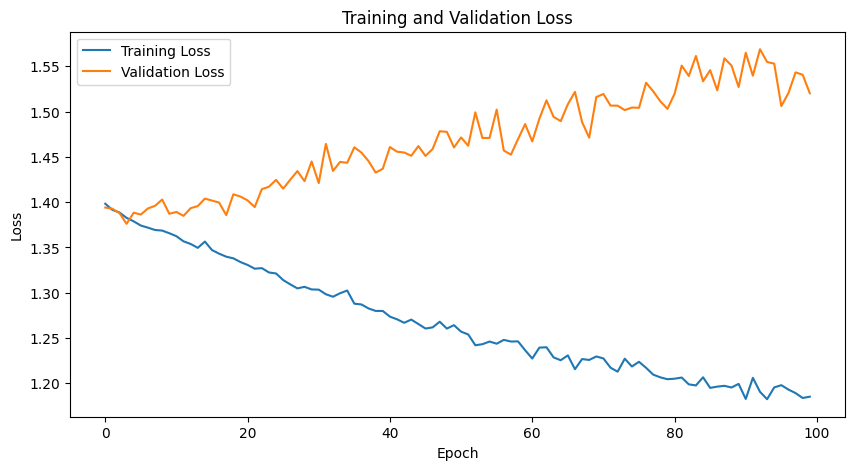

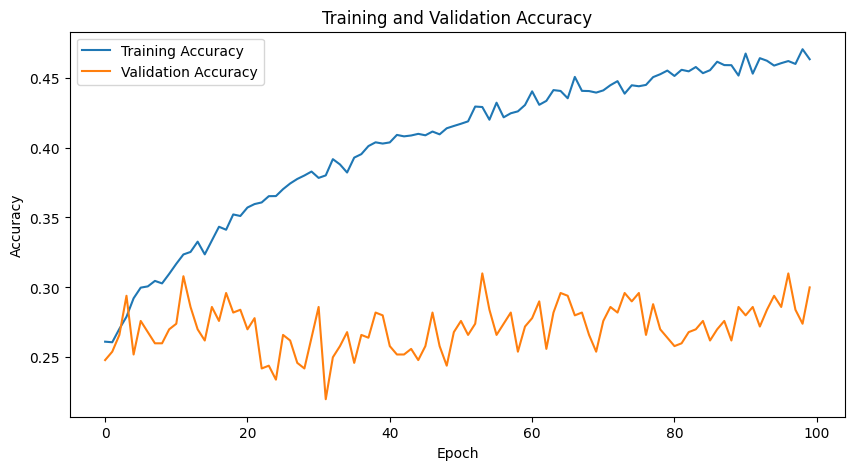

In [66]:
seed_everything(0)
model = RNN(input_dim=22, conv_dims=[32, 64, 128, 256], hidden_dim=128, num_layers=1)
model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=100, device=device)

Shape of training set: (14535, 22, 200)
Shape of validation set: (500, 22, 200)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (14535, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 8/8 [00:00<00:00, 802.37it/s]


Epoch 1/100 loss: 1.3834240938487805, acc: 0.2760233918128655, val_loss: 1.3691316992044449, val_acc: 0.356


100%|██████████| 8/8 [00:00<00:00, 814.01it/s]


Epoch 2/100 loss: 1.3745395060171162, acc: 0.30058479532163745, val_loss: 1.3640727549791336, val_acc: 0.35


100%|██████████| 8/8 [00:00<00:00, 816.23it/s]


Epoch 3/100 loss: 1.3689021321765162, acc: 0.3148262813897489, val_loss: 1.3514076173305511, val_acc: 0.38


100%|██████████| 8/8 [00:00<00:00, 819.74it/s]


Epoch 4/100 loss: 1.3610140069534904, acc: 0.33360853113175093, val_loss: 1.3383222967386246, val_acc: 0.376


100%|██████████| 8/8 [00:00<00:00, 814.01it/s]


Epoch 5/100 loss: 1.3547133348490064, acc: 0.33773649810801515, val_loss: 1.3281338959932327, val_acc: 0.414


100%|██████████| 8/8 [00:00<00:00, 826.75it/s]


Epoch 6/100 loss: 1.3487688914725655, acc: 0.3496388028895769, val_loss: 1.33066226541996, val_acc: 0.396


100%|██████████| 8/8 [00:00<00:00, 817.36it/s]


Epoch 7/100 loss: 1.335662187191478, acc: 0.3790849673202614, val_loss: 1.3075950294733047, val_acc: 0.416


100%|██████████| 8/8 [00:00<00:00, 807.86it/s]


Epoch 8/100 loss: 1.3229277238511203, acc: 0.3867905056759546, val_loss: 1.2955204546451569, val_acc: 0.434


100%|██████████| 8/8 [00:00<00:00, 816.87it/s]


Epoch 9/100 loss: 1.3189716746932583, acc: 0.3940144478844169, val_loss: 1.3027456551790237, val_acc: 0.426


100%|██████████| 8/8 [00:00<00:00, 817.50it/s]


Epoch 10/100 loss: 1.3076905555892409, acc: 0.41210870313037495, val_loss: 1.2885414958000183, val_acc: 0.434


100%|██████████| 8/8 [00:00<00:00, 700.95it/s]


Epoch 11/100 loss: 1.3014103022583745, acc: 0.4194014447884417, val_loss: 1.264564335346222, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 815.62it/s]


Epoch 12/100 loss: 1.2955402334531148, acc: 0.4237358101135191, val_loss: 1.2749529927968979, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 813.11it/s]


Epoch 13/100 loss: 1.2900498530320954, acc: 0.4330925352597179, val_loss: 1.2747350186109543, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 808.75it/s]


Epoch 14/100 loss: 1.2846743521983164, acc: 0.4385276917784658, val_loss: 1.2661423981189728, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 814.65it/s]


Epoch 15/100 loss: 1.284021426711166, acc: 0.4392156862745098, val_loss: 1.2809013724327087, val_acc: 0.432


100%|██████████| 8/8 [00:00<00:00, 809.98it/s]


Epoch 16/100 loss: 1.279235853437792, acc: 0.44595803233574133, val_loss: 1.269699677824974, val_acc: 0.444


100%|██████████| 8/8 [00:00<00:00, 816.33it/s]


Epoch 17/100 loss: 1.2745217424735689, acc: 0.4538699690402477, val_loss: 1.2578217089176178, val_acc: 0.468


100%|██████████| 8/8 [00:00<00:00, 803.10it/s]


Epoch 18/100 loss: 1.2696882021008877, acc: 0.45786033711730306, val_loss: 1.2522902339696884, val_acc: 0.484


100%|██████████| 8/8 [00:00<00:00, 812.79it/s]


Epoch 19/100 loss: 1.2688348638383966, acc: 0.45751633986928103, val_loss: 1.2461566179990768, val_acc: 0.49


100%|██████████| 8/8 [00:00<00:00, 813.56it/s]


Epoch 20/100 loss: 1.2644286129558295, acc: 0.46542827657378744, val_loss: 1.2508479952812195, val_acc: 0.474


100%|██████████| 8/8 [00:00<00:00, 804.14it/s]


Epoch 21/100 loss: 1.2612673086032533, acc: 0.4670106639146887, val_loss: 1.2363084852695465, val_acc: 0.488


100%|██████████| 8/8 [00:00<00:00, 815.70it/s]


Epoch 22/100 loss: 1.2566890371473212, acc: 0.4734090127278982, val_loss: 1.2567979097366333, val_acc: 0.468


100%|██████████| 8/8 [00:00<00:00, 813.70it/s]


Epoch 23/100 loss: 1.253859312387935, acc: 0.47794977640178876, val_loss: 1.2505004405975342, val_acc: 0.46


100%|██████████| 8/8 [00:00<00:00, 701.20it/s]


Epoch 24/100 loss: 1.2556035889868151, acc: 0.4760233918128655, val_loss: 1.2563754171133041, val_acc: 0.472


100%|██████████| 8/8 [00:00<00:00, 816.25it/s]


Epoch 25/100 loss: 1.2542427312909512, acc: 0.47299621603027175, val_loss: 1.2575001418590546, val_acc: 0.466


100%|██████████| 8/8 [00:00<00:00, 801.53it/s]


Epoch 26/100 loss: 1.250845371108306, acc: 0.4797385620915033, val_loss: 1.2454888969659805, val_acc: 0.466


100%|██████████| 8/8 [00:00<00:00, 814.03it/s]


Epoch 27/100 loss: 1.245704762768327, acc: 0.4888200894392845, val_loss: 1.2376778870821, val_acc: 0.492


100%|██████████| 8/8 [00:00<00:00, 698.51it/s]


Epoch 28/100 loss: 1.2388658471274794, acc: 0.49432404540763675, val_loss: 1.2420823574066162, val_acc: 0.482


100%|██████████| 8/8 [00:00<00:00, 795.54it/s]


Epoch 29/100 loss: 1.2422753206470556, acc: 0.491640866873065, val_loss: 1.2365688532590866, val_acc: 0.484


100%|██████████| 8/8 [00:00<00:00, 795.79it/s]


Epoch 30/100 loss: 1.2388234792048471, acc: 0.49714482284141726, val_loss: 1.2673014104366302, val_acc: 0.454


100%|██████████| 8/8 [00:00<00:00, 807.14it/s]


Epoch 31/100 loss: 1.2386975450473918, acc: 0.49384244926040594, val_loss: 1.2445883452892303, val_acc: 0.476


100%|██████████| 8/8 [00:00<00:00, 810.87it/s]


Epoch 32/100 loss: 1.2342189435373272, acc: 0.4996904024767802, val_loss: 1.247663602232933, val_acc: 0.478


100%|██████████| 8/8 [00:00<00:00, 814.05it/s]


Epoch 33/100 loss: 1.2335278282040043, acc: 0.49948400412796695, val_loss: 1.2478728741407394, val_acc: 0.478


100%|██████████| 8/8 [00:00<00:00, 811.26it/s]


Epoch 34/100 loss: 1.2323449635714816, acc: 0.5014103887168903, val_loss: 1.255520686507225, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 703.06it/s]


Epoch 35/100 loss: 1.2333481269970274, acc: 0.5032679738562091, val_loss: 1.2493364959955215, val_acc: 0.47


100%|██████████| 8/8 [00:00<00:00, 703.11it/s]


Epoch 36/100 loss: 1.2301802216914661, acc: 0.5045063639490884, val_loss: 1.245202288031578, val_acc: 0.474


100%|██████████| 8/8 [00:00<00:00, 816.59it/s]


Epoch 37/100 loss: 1.2277746064621105, acc: 0.5071895424836601, val_loss: 1.2523983269929886, val_acc: 0.474


100%|██████████| 8/8 [00:00<00:00, 813.91it/s]


Epoch 38/100 loss: 1.2259503352014642, acc: 0.5122119023047815, val_loss: 1.2712781578302383, val_acc: 0.436


100%|██████████| 8/8 [00:00<00:00, 817.52it/s]


Epoch 39/100 loss: 1.2317317133409935, acc: 0.5013415892672859, val_loss: 1.2692350894212723, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 710.25it/s]


Epoch 40/100 loss: 1.2224189137157642, acc: 0.5132438940488476, val_loss: 1.2503262609243393, val_acc: 0.466


100%|██████████| 8/8 [00:00<00:00, 815.46it/s]


Epoch 41/100 loss: 1.2201414045534635, acc: 0.5131750945992432, val_loss: 1.2516458332538605, val_acc: 0.47


100%|██████████| 8/8 [00:00<00:00, 790.69it/s]


Epoch 42/100 loss: 1.217324249577104, acc: 0.52046783625731, val_loss: 1.2511129826307297, val_acc: 0.488


100%|██████████| 8/8 [00:00<00:00, 815.64it/s]


Epoch 43/100 loss: 1.2169327892755206, acc: 0.5194358445132439, val_loss: 1.270720824599266, val_acc: 0.436


100%|██████████| 8/8 [00:00<00:00, 805.15it/s]


Epoch 44/100 loss: 1.2205748296620553, acc: 0.515032679738562, val_loss: 1.2489366978406906, val_acc: 0.472


100%|██████████| 8/8 [00:00<00:00, 788.57it/s]


Epoch 45/100 loss: 1.2150498163281827, acc: 0.5212934296525628, val_loss: 1.263278380036354, val_acc: 0.454


100%|██████████| 8/8 [00:00<00:00, 788.44it/s]


Epoch 46/100 loss: 1.2111529056963168, acc: 0.5262469900240798, val_loss: 1.242271363735199, val_acc: 0.484


100%|██████████| 8/8 [00:00<00:00, 803.37it/s]


Epoch 47/100 loss: 1.2078659110947658, acc: 0.5277605779153767, val_loss: 1.2424763292074203, val_acc: 0.478


100%|██████████| 8/8 [00:00<00:00, 792.99it/s]


Epoch 48/100 loss: 1.208846215093345, acc: 0.5270037839697282, val_loss: 1.2476231306791306, val_acc: 0.48


100%|██████████| 8/8 [00:00<00:00, 797.85it/s]


Epoch 49/100 loss: 1.20535342421448, acc: 0.5312693498452012, val_loss: 1.2439595013856888, val_acc: 0.476


100%|██████████| 8/8 [00:00<00:00, 790.30it/s]


Epoch 50/100 loss: 1.2026236287334509, acc: 0.5380116959064327, val_loss: 1.25180384516716, val_acc: 0.46


100%|██████████| 8/8 [00:00<00:00, 781.90it/s]


Epoch 51/100 loss: 1.2038942345401697, acc: 0.5325077399380805, val_loss: 1.258419007062912, val_acc: 0.46


100%|██████████| 8/8 [00:00<00:00, 794.51it/s]


Epoch 52/100 loss: 1.1992921248862618, acc: 0.5382180942552459, val_loss: 1.2641183882951736, val_acc: 0.46


100%|██████████| 8/8 [00:00<00:00, 792.18it/s]


Epoch 53/100 loss: 1.1977665581201251, acc: 0.5431028551771586, val_loss: 1.2650190144777298, val_acc: 0.444


100%|██████████| 8/8 [00:00<00:00, 795.26it/s]


Epoch 54/100 loss: 1.2022599635417002, acc: 0.5334709322325422, val_loss: 1.2539866119623184, val_acc: 0.46


100%|██████████| 8/8 [00:00<00:00, 817.72it/s]


Epoch 55/100 loss: 1.1936626450011605, acc: 0.5452356381148951, val_loss: 1.2697512954473495, val_acc: 0.444


100%|██████████| 8/8 [00:00<00:00, 808.19it/s]


Epoch 56/100 loss: 1.1958495506591964, acc: 0.5387684898520811, val_loss: 1.2588448375463486, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 804.16it/s]


Epoch 57/100 loss: 1.1954800167627502, acc: 0.5426212590299277, val_loss: 1.241271272301674, val_acc: 0.494


100%|██████████| 8/8 [00:00<00:00, 811.89it/s]


Epoch 58/100 loss: 1.1902411119979726, acc: 0.5479188166494668, val_loss: 1.2416572719812393, val_acc: 0.482


100%|██████████| 8/8 [00:00<00:00, 807.70it/s]


Epoch 59/100 loss: 1.1901434069139916, acc: 0.5510147918816649, val_loss: 1.2546976655721664, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 717.04it/s]


Epoch 60/100 loss: 1.1816039106302094, acc: 0.5570003439972481, val_loss: 1.2568891644477844, val_acc: 0.468


100%|██████████| 8/8 [00:00<00:00, 814.84it/s]


Epoch 61/100 loss: 1.184017050684544, acc: 0.5537667698658411, val_loss: 1.246665209531784, val_acc: 0.468


100%|██████████| 8/8 [00:00<00:00, 804.55it/s]


Epoch 62/100 loss: 1.181321526828565, acc: 0.5585827313381493, val_loss: 1.2548341751098633, val_acc: 0.466


100%|██████████| 8/8 [00:00<00:00, 806.58it/s]


Epoch 63/100 loss: 1.1780094237704026, acc: 0.5603027175782593, val_loss: 1.2517343163490295, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 803.03it/s]


Epoch 64/100 loss: 1.1798973193294124, acc: 0.5616787065703475, val_loss: 1.2512163817882538, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 813.03it/s]


Epoch 65/100 loss: 1.1772205494997794, acc: 0.5632610939112487, val_loss: 1.2776791006326675, val_acc: 0.44


100%|██████████| 8/8 [00:00<00:00, 700.86it/s]


Epoch 66/100 loss: 1.1731209718344504, acc: 0.5639490884072927, val_loss: 1.2597095519304276, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 703.65it/s]


Epoch 67/100 loss: 1.1699136163581882, acc: 0.5711042311661507, val_loss: 1.2563829123973846, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 695.99it/s]


Epoch 68/100 loss: 1.1711121672078182, acc: 0.5689026487788098, val_loss: 1.2548149079084396, val_acc: 0.468


100%|██████████| 8/8 [00:00<00:00, 700.85it/s]


Epoch 69/100 loss: 1.1733507717910565, acc: 0.565875472996216, val_loss: 1.2552440911531448, val_acc: 0.47


100%|██████████| 8/8 [00:00<00:00, 702.56it/s]


Epoch 70/100 loss: 1.1673095566138887, acc: 0.5754385964912281, val_loss: 1.2549667209386826, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 803.29it/s]


Epoch 71/100 loss: 1.168712070636582, acc: 0.5696594427244582, val_loss: 1.2474477589130402, val_acc: 0.458


100%|██████████| 8/8 [00:00<00:00, 811.36it/s]


Epoch 72/100 loss: 1.166572067821235, acc: 0.5761953904368765, val_loss: 1.278668761253357, val_acc: 0.446


100%|██████████| 8/8 [00:00<00:00, 811.32it/s]


Epoch 73/100 loss: 1.1642960848515493, acc: 0.5795665634674922, val_loss: 1.2582718878984451, val_acc: 0.47


100%|██████████| 8/8 [00:00<00:00, 808.00it/s]


Epoch 74/100 loss: 1.1586234146042873, acc: 0.5861025111799105, val_loss: 1.2422505617141724, val_acc: 0.486


100%|██████████| 8/8 [00:00<00:00, 818.44it/s]


Epoch 75/100 loss: 1.1586527894986303, acc: 0.5830065359477125, val_loss: 1.258262813091278, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 809.05it/s]


Epoch 76/100 loss: 1.1596831825741551, acc: 0.5838321293429652, val_loss: 1.2518556118011475, val_acc: 0.47


100%|██████████| 8/8 [00:00<00:00, 751.50it/s]


Epoch 77/100 loss: 1.151897688183868, acc: 0.5877536979704162, val_loss: 1.255330115556717, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 700.28it/s]


Epoch 78/100 loss: 1.1539097240096645, acc: 0.587203302373581, val_loss: 1.2620754688978195, val_acc: 0.466


100%|██████████| 8/8 [00:00<00:00, 753.81it/s]


Epoch 79/100 loss: 1.1598913512731854, acc: 0.5821121431028552, val_loss: 1.264178678393364, val_acc: 0.452


100%|██████████| 8/8 [00:00<00:00, 812.59it/s]


Epoch 80/100 loss: 1.1516408198758175, acc: 0.5888544891640867, val_loss: 1.2514866441488266, val_acc: 0.464


100%|██████████| 8/8 [00:00<00:00, 811.53it/s]


Epoch 81/100 loss: 1.1486132463865113, acc: 0.595046439628483, val_loss: 1.2871838957071304, val_acc: 0.438


100%|██████████| 8/8 [00:00<00:00, 817.28it/s]


Epoch 82/100 loss: 1.1544753135296337, acc: 0.5878224974200207, val_loss: 1.2681428790092468, val_acc: 0.456


100%|██████████| 8/8 [00:00<00:00, 813.40it/s]


Epoch 83/100 loss: 1.1493699676112126, acc: 0.5949776401788786, val_loss: 1.2509644627571106, val_acc: 0.476


100%|██████████| 8/8 [00:00<00:00, 814.55it/s]


Epoch 84/100 loss: 1.14454091379517, acc: 0.5992432060543516, val_loss: 1.2581962943077087, val_acc: 0.448


100%|██████████| 8/8 [00:00<00:00, 812.22it/s]


Epoch 85/100 loss: 1.1453395033614677, acc: 0.5982112143102856, val_loss: 1.2837371826171875, val_acc: 0.44


100%|██████████| 8/8 [00:00<00:00, 811.71it/s]


Epoch 86/100 loss: 1.150269877492336, acc: 0.5899552803577571, val_loss: 1.2756807208061218, val_acc: 0.448


100%|██████████| 8/8 [00:00<00:00, 807.39it/s]


Epoch 87/100 loss: 1.1417673439310307, acc: 0.6041279669762641, val_loss: 1.2492648214101791, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 819.64it/s]


Epoch 88/100 loss: 1.1379632217842235, acc: 0.6076367389060887, val_loss: 1.2693472653627396, val_acc: 0.456


100%|██████████| 8/8 [00:00<00:00, 812.04it/s]


Epoch 89/100 loss: 1.1435655512307819, acc: 0.5991744066047472, val_loss: 1.2695967853069305, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 814.05it/s]


Epoch 90/100 loss: 1.1437010310198132, acc: 0.5995184038527692, val_loss: 1.2681125700473785, val_acc: 0.458


100%|██████████| 8/8 [00:00<00:00, 813.56it/s]


Epoch 91/100 loss: 1.1415957175848777, acc: 0.5995184038527692, val_loss: 1.244928017258644, val_acc: 0.48


100%|██████████| 8/8 [00:00<00:00, 811.71it/s]


Epoch 92/100 loss: 1.1350468135716623, acc: 0.6113519091847265, val_loss: 1.2627853006124496, val_acc: 0.454


100%|██████████| 8/8 [00:00<00:00, 813.60it/s]


Epoch 93/100 loss: 1.1320741874606985, acc: 0.6108703130374957, val_loss: 1.257307231426239, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 812.40it/s]


Epoch 94/100 loss: 1.1340836385885875, acc: 0.611420708634331, val_loss: 1.263860821723938, val_acc: 0.462


100%|██████████| 8/8 [00:00<00:00, 812.55it/s]


Epoch 95/100 loss: 1.1270113812203992, acc: 0.6168558651530788, val_loss: 1.2588933557271957, val_acc: 0.48


100%|██████████| 8/8 [00:00<00:00, 692.84it/s]


Epoch 96/100 loss: 1.1273717111662815, acc: 0.6161678706570347, val_loss: 1.2692978233098984, val_acc: 0.458


100%|██████████| 8/8 [00:00<00:00, 784.97it/s]


Epoch 97/100 loss: 1.1294895031473093, acc: 0.6136910904712762, val_loss: 1.2647957652807236, val_acc: 0.456


100%|██████████| 8/8 [00:00<00:00, 813.95it/s]


Epoch 98/100 loss: 1.1323059896628063, acc: 0.6123839009287926, val_loss: 1.2538729161024094, val_acc: 0.456


100%|██████████| 8/8 [00:00<00:00, 772.45it/s]


Epoch 99/100 loss: 1.1271364521562008, acc: 0.6196766425868593, val_loss: 1.2611574083566666, val_acc: 0.454


100%|██████████| 8/8 [00:00<00:00, 698.02it/s]


Epoch 100/100 loss: 1.1211953008906883, acc: 0.6220846233230134, val_loss: 1.2600275725126266, val_acc: 0.47


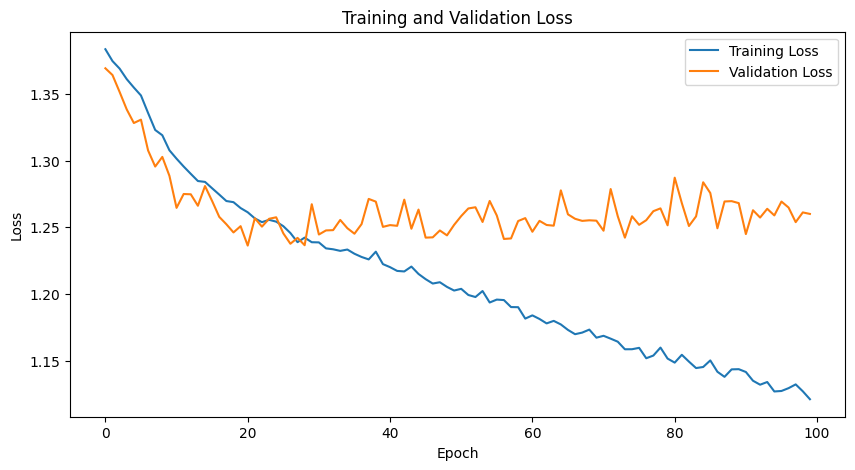

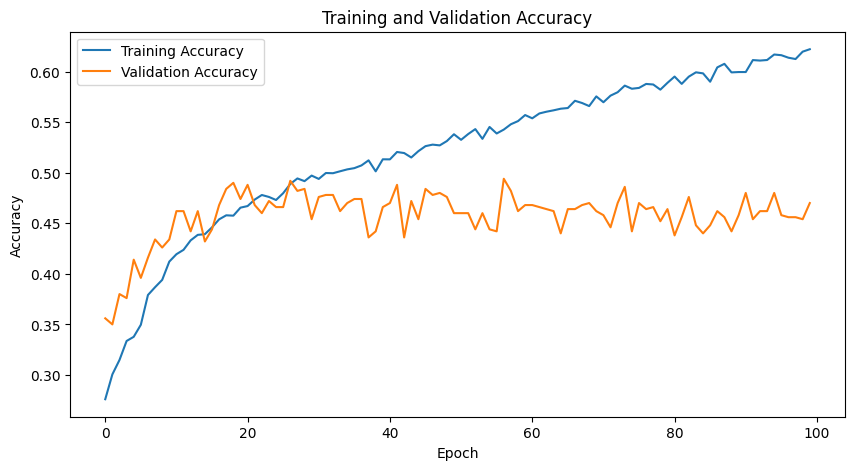

In [58]:
model = CNN_Attention_Model()
model.to(device)

optimizer = Adam(model.parameters(), weight_decay=1e-2, lr=1e-4)
criterion = nn.CrossEntropyLoss()

fit(model, optimizer, criterion, num_epochs=100, device=device)

Shape of training set: (14535, 22, 200)
Shape of validation set: (500, 22, 200)
Shape of training labels: (14535,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (14535, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)


100%|██████████| 8/8 [00:00<00:00, 760.35it/s]


Epoch 1/62 loss: 1.383748526113075, acc: 0.2782249742002064, val_loss: 1.3807974010705948, val_acc: 0.26


100%|██████████| 8/8 [00:00<00:00, 770.83it/s]


Epoch 2/62 loss: 1.3719338612598286, acc: 0.312280701754386, val_loss: 1.3685870170593262, val_acc: 0.3


100%|██████████| 8/8 [00:00<00:00, 770.85it/s]


Epoch 3/62 loss: 1.3575383445672822, acc: 0.33629170966632266, val_loss: 1.3501699268817902, val_acc: 0.336


100%|██████████| 8/8 [00:00<00:00, 761.99it/s]


Epoch 4/62 loss: 1.3375304163547985, acc: 0.3629858961128311, val_loss: 1.3229998648166656, val_acc: 0.374


100%|██████████| 8/8 [00:00<00:00, 770.09it/s]


Epoch 5/62 loss: 1.3127174753891795, acc: 0.3876160990712074, val_loss: 1.3018298149108887, val_acc: 0.392


100%|██████████| 8/8 [00:00<00:00, 763.64it/s]


Epoch 6/62 loss: 1.2862026346357245, acc: 0.41396628826969384, val_loss: 1.2532608211040497, val_acc: 0.45


100%|██████████| 8/8 [00:00<00:00, 762.79it/s]


Epoch 7/62 loss: 1.2627603469187754, acc: 0.4318541451668387, val_loss: 1.231298878788948, val_acc: 0.442


100%|██████████| 8/8 [00:00<00:00, 762.31it/s]


Epoch 8/62 loss: 1.2399602736297406, acc: 0.45586515307877534, val_loss: 1.1995437741279602, val_acc: 0.506


100%|██████████| 8/8 [00:00<00:00, 769.17it/s]


Epoch 9/62 loss: 1.2122126896130412, acc: 0.4809769521843825, val_loss: 1.1787403225898743, val_acc: 0.484


100%|██████████| 8/8 [00:00<00:00, 772.31it/s]


Epoch 10/62 loss: 1.1928587090550808, acc: 0.49955280357757137, val_loss: 1.1379664242267609, val_acc: 0.51


100%|██████████| 8/8 [00:00<00:00, 766.61it/s]


Epoch 11/62 loss: 1.160776193204679, acc: 0.5256965944272446, val_loss: 1.1228293180465698, val_acc: 0.526


100%|██████████| 8/8 [00:00<00:00, 766.91it/s]


Epoch 12/62 loss: 1.1375867206799357, acc: 0.5413828689370485, val_loss: 1.056251883506775, val_acc: 0.598


100%|██████████| 8/8 [00:00<00:00, 776.27it/s]


Epoch 13/62 loss: 1.1145712254863036, acc: 0.5570003439972481, val_loss: 1.0766540095210075, val_acc: 0.58


100%|██████████| 8/8 [00:00<00:00, 785.58it/s]


Epoch 14/62 loss: 1.0890187150553654, acc: 0.5739938080495356, val_loss: 1.0664808601140976, val_acc: 0.594


100%|██████████| 8/8 [00:00<00:00, 778.63it/s]


Epoch 15/62 loss: 1.065554746148879, acc: 0.594358445132439, val_loss: 1.0890129208564758, val_acc: 0.6


100%|██████████| 8/8 [00:00<00:00, 764.16it/s]


Epoch 16/62 loss: 1.0483430234486597, acc: 0.6055727554179566, val_loss: 1.0254656597971916, val_acc: 0.606


100%|██████████| 8/8 [00:00<00:00, 769.60it/s]


Epoch 17/62 loss: 1.0216850183512036, acc: 0.6242862057103543, val_loss: 1.0361792668700218, val_acc: 0.602


100%|██████████| 8/8 [00:00<00:00, 759.42it/s]


Epoch 18/62 loss: 1.0010057431563997, acc: 0.6366013071895424, val_loss: 1.0287917479872704, val_acc: 0.628


100%|██████████| 8/8 [00:00<00:00, 765.23it/s]


Epoch 19/62 loss: 0.986385186513265, acc: 0.6468524251805986, val_loss: 0.9751446917653084, val_acc: 0.658


100%|██████████| 8/8 [00:00<00:00, 766.40it/s]


Epoch 20/62 loss: 0.9669378276979714, acc: 0.6602683178534572, val_loss: 0.9914770722389221, val_acc: 0.646


100%|██████████| 8/8 [00:00<00:00, 771.15it/s]


Epoch 21/62 loss: 0.9503632404825144, acc: 0.6718266253869969, val_loss: 0.9571374803781509, val_acc: 0.674


100%|██████████| 8/8 [00:00<00:00, 758.09it/s]


Epoch 22/62 loss: 0.9311180624522661, acc: 0.6797385620915033, val_loss: 1.0151111260056496, val_acc: 0.622


100%|██████████| 8/8 [00:00<00:00, 769.60it/s]


Epoch 23/62 loss: 0.922399434342719, acc: 0.6852425180598555, val_loss: 0.9454136490821838, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 771.35it/s]


Epoch 24/62 loss: 0.9115047562017775, acc: 0.6944616443068455, val_loss: 0.959737092256546, val_acc: 0.672


100%|██████████| 8/8 [00:00<00:00, 762.32it/s]


Epoch 25/62 loss: 0.8901847569566024, acc: 0.7112487100103199, val_loss: 0.9408393129706383, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 763.21it/s]


Epoch 26/62 loss: 0.8774653257508027, acc: 0.7164774681802546, val_loss: 0.9173828065395355, val_acc: 0.692


100%|██████████| 8/8 [00:00<00:00, 771.77it/s]


Epoch 27/62 loss: 0.8605045077570698, acc: 0.7294805641554868, val_loss: 0.9505225047469139, val_acc: 0.688


100%|██████████| 8/8 [00:00<00:00, 765.19it/s]


Epoch 28/62 loss: 0.8520288958884122, acc: 0.7317509459924321, val_loss: 0.9228706434369087, val_acc: 0.706


100%|██████████| 8/8 [00:00<00:00, 642.98it/s]


Epoch 29/62 loss: 0.8374331256276683, acc: 0.7443412452700379, val_loss: 0.9519328027963638, val_acc: 0.668


100%|██████████| 8/8 [00:00<00:00, 646.33it/s]


Epoch 30/62 loss: 0.8239555238631734, acc: 0.7506019951840385, val_loss: 0.9374616965651512, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 644.73it/s]


Epoch 31/62 loss: 0.8147988037059182, acc: 0.7526659786721707, val_loss: 0.9237177968025208, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 644.29it/s]


Epoch 32/62 loss: 0.800695783736413, acc: 0.7684898520811834, val_loss: 0.9110606610774994, val_acc: 0.712


100%|██████████| 8/8 [00:00<00:00, 641.44it/s]


Epoch 33/62 loss: 0.7891806424186941, acc: 0.769797041623667, val_loss: 0.9469367042183876, val_acc: 0.698


100%|██████████| 8/8 [00:00<00:00, 642.24it/s]


Epoch 34/62 loss: 0.7838163347097865, acc: 0.7732370141038871, val_loss: 0.9456776678562164, val_acc: 0.68


100%|██████████| 8/8 [00:00<00:00, 644.91it/s]


Epoch 35/62 loss: 0.774100137907162, acc: 0.7789473684210526, val_loss: 0.932740181684494, val_acc: 0.712


100%|██████████| 8/8 [00:00<00:00, 642.71it/s]


Epoch 36/62 loss: 0.7596269741392973, acc: 0.7917440660474716, val_loss: 0.9257463812828064, val_acc: 0.71


100%|██████████| 8/8 [00:00<00:00, 764.01it/s]


Epoch 37/62 loss: 0.7496062600821779, acc: 0.7968352253181975, val_loss: 0.9417890086770058, val_acc: 0.664


100%|██████████| 8/8 [00:00<00:00, 762.17it/s]


Epoch 38/62 loss: 0.7392243842283884, acc: 0.8052287581699347, val_loss: 0.9318804666399956, val_acc: 0.684


100%|██████████| 8/8 [00:00<00:00, 753.44it/s]


Epoch 39/62 loss: 0.7337140958560141, acc: 0.8086687306501548, val_loss: 0.9174710735678673, val_acc: 0.708


100%|██████████| 8/8 [00:00<00:00, 761.35it/s]


Epoch 40/62 loss: 0.7241901888659126, acc: 0.8094255245958032, val_loss: 0.8959493264555931, val_acc: 0.708


100%|██████████| 8/8 [00:00<00:00, 756.53it/s]


Epoch 41/62 loss: 0.7181646800354907, acc: 0.8114895080839353, val_loss: 0.9390762224793434, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 757.74it/s]


Epoch 42/62 loss: 0.7079120330643236, acc: 0.8257309941520468, val_loss: 0.904699794948101, val_acc: 0.706


100%|██████████| 8/8 [00:00<00:00, 754.63it/s]


Epoch 43/62 loss: 0.6987563868363699, acc: 0.8269005847953217, val_loss: 0.9113555252552032, val_acc: 0.712


100%|██████████| 8/8 [00:00<00:00, 760.10it/s]


Epoch 44/62 loss: 0.6949423033940164, acc: 0.8306845545235638, val_loss: 0.9331480488181114, val_acc: 0.69


100%|██████████| 8/8 [00:00<00:00, 642.67it/s]


Epoch 45/62 loss: 0.6922320320940855, acc: 0.8328173374613003, val_loss: 0.9189889281988144, val_acc: 0.702


100%|██████████| 8/8 [00:00<00:00, 764.62it/s]


Epoch 46/62 loss: 0.6777124462420481, acc: 0.8448572411420708, val_loss: 0.926496222615242, val_acc: 0.698


100%|██████████| 8/8 [00:00<00:00, 761.70it/s]


Epoch 47/62 loss: 0.6741120464969099, acc: 0.8456140350877193, val_loss: 0.9415789097547531, val_acc: 0.692


100%|██████████| 8/8 [00:00<00:00, 762.06it/s]


Epoch 48/62 loss: 0.668058750399372, acc: 0.8498108015135879, val_loss: 0.9410459101200104, val_acc: 0.704


100%|██████████| 8/8 [00:00<00:00, 759.17it/s]


Epoch 49/62 loss: 0.6562982376730233, acc: 0.8540075679394565, val_loss: 0.9300846233963966, val_acc: 0.718


100%|██████████| 8/8 [00:00<00:00, 633.23it/s]


Epoch 50/62 loss: 0.6453280760007992, acc: 0.8619195046439628, val_loss: 0.9361607283353806, val_acc: 0.698


100%|██████████| 8/8 [00:00<00:00, 677.36it/s]


Epoch 51/62 loss: 0.643821713432931, acc: 0.8643962848297214, val_loss: 0.9222259074449539, val_acc: 0.686


100%|██████████| 8/8 [00:00<00:00, 660.21it/s]


Epoch 52/62 loss: 0.6397376570262407, acc: 0.8652218782249742, val_loss: 0.9059501141309738, val_acc: 0.7


100%|██████████| 8/8 [00:00<00:00, 783.82it/s]


Epoch 53/62 loss: 0.6317804908020455, acc: 0.8712074303405573, val_loss: 0.930803582072258, val_acc: 0.692


100%|██████████| 8/8 [00:00<00:00, 645.72it/s]


Epoch 54/62 loss: 0.6324141574533362, acc: 0.8705194358445132, val_loss: 0.9019860997796059, val_acc: 0.708


100%|██████████| 8/8 [00:00<00:00, 644.51it/s]


Epoch 55/62 loss: 0.6211016199045014, acc: 0.8767801857585139, val_loss: 0.9288085848093033, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 774.02it/s]


Epoch 56/62 loss: 0.6116167725178233, acc: 0.8819401444788442, val_loss: 0.9136588200926781, val_acc: 0.714


100%|██████████| 8/8 [00:00<00:00, 656.26it/s]


Epoch 57/62 loss: 0.6139759826555586, acc: 0.87953216374269, val_loss: 0.9470525532960892, val_acc: 0.696


100%|██████████| 8/8 [00:00<00:00, 760.60it/s]


Epoch 58/62 loss: 0.6102359587686104, acc: 0.8844169246646026, val_loss: 0.9241916909813881, val_acc: 0.694


100%|██████████| 8/8 [00:00<00:00, 763.66it/s]


Epoch 59/62 loss: 0.6053477899547208, acc: 0.8853801169590644, val_loss: 0.9025392383337021, val_acc: 0.732


100%|██████████| 8/8 [00:00<00:00, 760.56it/s]


Epoch 60/62 loss: 0.5954225931251258, acc: 0.8942552459580323, val_loss: 0.9090759307146072, val_acc: 0.72


100%|██████████| 8/8 [00:00<00:00, 763.97it/s]


Epoch 61/62 loss: 0.5905760390716687, acc: 0.8964568283453732, val_loss: 0.9137952402234077, val_acc: 0.722


100%|██████████| 8/8 [00:00<00:00, 645.40it/s]


Epoch 62/62 loss: 0.5901443319101083, acc: 0.8936360509115927, val_loss: 0.9194496273994446, val_acc: 0.698


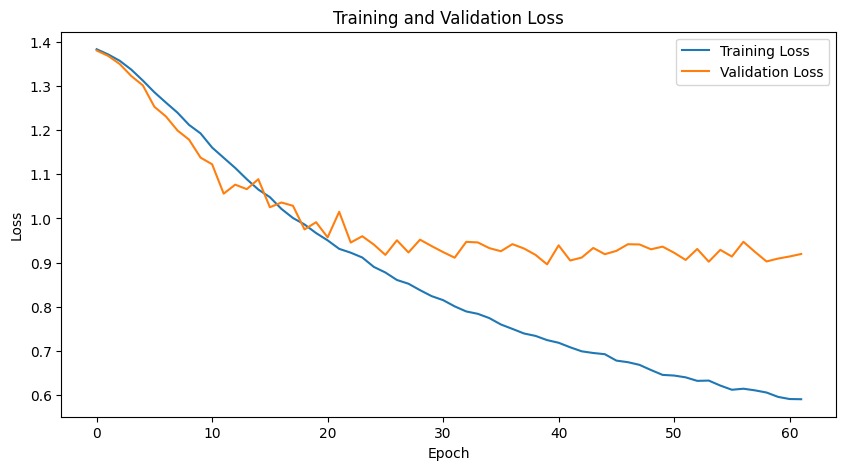

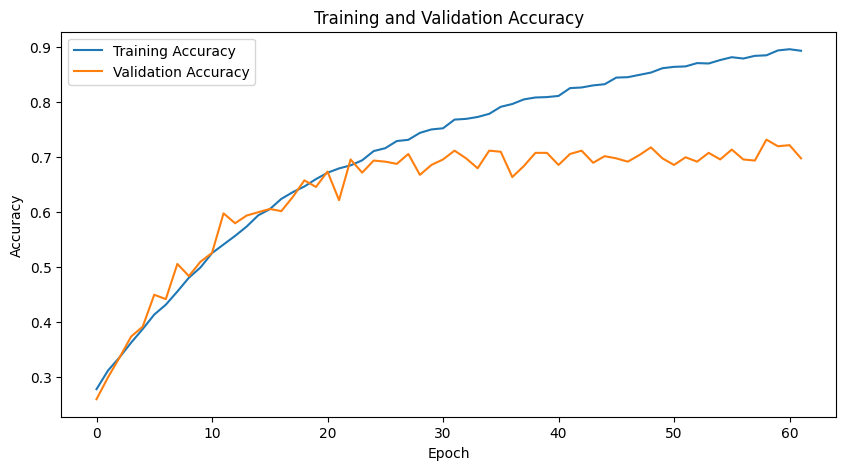

In [62]:
seed_everything(0)
kernel_size = 11
pad = 5

model = CNN(kernel_size=kernel_size, pad=pad)
model.to(device)

weight_decay = 1e-2

lr = 1e-3
optimizer = torch.optim.SGD(params=model.parameters(), momentum=0.9, lr=lr, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)

fit(model, optimizer, criterion, num_epochs=62, device=device)